In [1]:
# =========================================
# Exploratory Data Analysis (EDA)
# Projeto: Statistical Inference Project
# Autor: João Victor Barros
# =========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.utils import savefig

# Caminho para salvar as figuras
FIG_DIR = "../figures/eda/"
os.makedirs(FIG_DIR, exist_ok=True)

# Configurações de estilo dos gráficos
plt.style.use('default')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = (7, 4)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [2]:
file_path = "../data/ndt_tests_corrigido.csv"
try:
    df = pd.read_csv(file_path, parse_dates=[0])
except FileNotFoundError:
    print("Erro: O arquivo '.csv' não foi encontrado. Verifique o caminho.")

df.head()

,timestamp,download_throughput_bps,rtt_download_sec,upload_throughput_bps,rtt_upload_sec,packet_loss_percent,client,server
0,2025-08-09 15:28:02+00:00,8.223657e+07,0.231862,6.973217e+07,0.247727,0.000000,client12,server06
1,2025-08-09 15:30:11+00:00,9.027315e+08,0.012000,8.521780e+08,0.005423,0.008226,client01,server07
2,2025-08-10 04:27:43+00:00,5.910655e+08,0.014000,2.812188e+08,0.014544,5.954284,client13,server07
3,2025-08-09 22:45:07+00:00,6.721139e+08,0.011000,1.135400e+08,0.010482,0.261528,client12,server07
4,2025-08-10 04:49:21+00:00,8.122087e+08,0.009000,6.857905e+08,0.009368,1.381646,client03,server03


# Estatísticas Descritivas

Fazendo o calculo das estatísticas descritivas para todo o dataset

In [3]:
METRICS_COLUMNS = [
    'download_throughput_bps', 
    'rtt_download_sec',
    'packet_loss_percent',
    'upload_throughput_bps',
    'rtt_upload_sec',
]
SELECTED_QUANTILES = [0.25, 0.50, 0.75, 0.90, 0.95, 0.99]

def calculate_network_stats(data_series):
    """Calcula estatísticas descritivas (média, variância, etc.) e os quantis de rede."""
    
    stats = data_series.agg(['mean', 'median', 'std', 'var', 'count', 'min', 'max'])
    quantiles = data_series.quantile(SELECTED_QUANTILES)
    quantiles.index = [f'Q_{q}' for q in SELECTED_QUANTILES]
    
    return pd.concat([stats, quantiles])

print("\n" + "-"*300)
print("Tabela de Estatísticas Descritivas Gerais (Completa)")
print("-"*300)

df_general_stats = df[METRICS_COLUMNS].apply(calculate_network_stats)
df_stats_transposed = df_general_stats.T

with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 300):
    print(df_stats_transposed)

print("\n" + "="*80)


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Tabela de Estatísticas Descritivas Gerais (Completa)
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                 mean        median           std           var   count    min           max        Q_0.25         Q_0.5        Q_0.75         Q_0.9        Q_0.95        Q_0.99
download_throughput_bps  5.062996e+08  5.960927e+08  3.352129e+08  1.123677e+17  7087.0 -1.000  9.332671e+08  1.642170e+08  5.960927e+08  8.489080e+08 

Fazendo o calculo das estatísticas descritivas para cada cliente e servidor

In [4]:
unique_clients = df['client'].unique()
print("\n" + "-"*300)
for current_client in unique_clients:
    
    df_client = df[df['client'] == current_client].copy()

    print(f"Tabela de Estatísticas Descritivas Gerais ({current_client})")
    print("-"*300)

    df_general_stats = df_client[METRICS_COLUMNS].apply(calculate_network_stats)
    df_stats_transposed = df_general_stats.T

    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 300):
        print(df_stats_transposed)

    print("\n" + "-"*300)


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Tabela de Estatísticas Descritivas Gerais (client12)
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                 mean        median           std           var  count           min           max        Q_0.25         Q_0.5        Q_0.75         Q_0.9        Q_0.95        Q_0.99
download_throughput_bps  4.647659e+08  6.360041e+08  2.848758e+08  8.115420e+16  640.0  1.642357e+07  8.119040e+08  8.713393e+07  6.360041e+08  6

In [5]:
unique_servers = df['server'].unique()
print("\n" + "-"*300)
for current_server in unique_servers:
    
    df_client = df[df['server'] == current_server].copy()

    print(f"Tabela de Estatísticas Descritivas Gerais ({current_server})")
    print("-"*300)

    df_general_stats = df_client[METRICS_COLUMNS].apply(calculate_network_stats)
    df_stats_transposed = df_general_stats.T

    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 300):
        print(df_stats_transposed)

    print("\n" + "-"*300)


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Tabela de Estatísticas Descritivas Gerais (server06)
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                 mean        median           std           var  count           min           max        Q_0.25         Q_0.5        Q_0.75         Q_0.9        Q_0.95        Q_0.99
download_throughput_bps  2.053733e+08  1.695638e+08  1.907056e+08  3.636863e+16  561.0  3.993820e+06  7.964729e+08  8.478350e+07  1.695638e+08  1

Análise geral dos histogramas para o dataset completo.

Figura salva: ../figures/eda/histogram_full.png


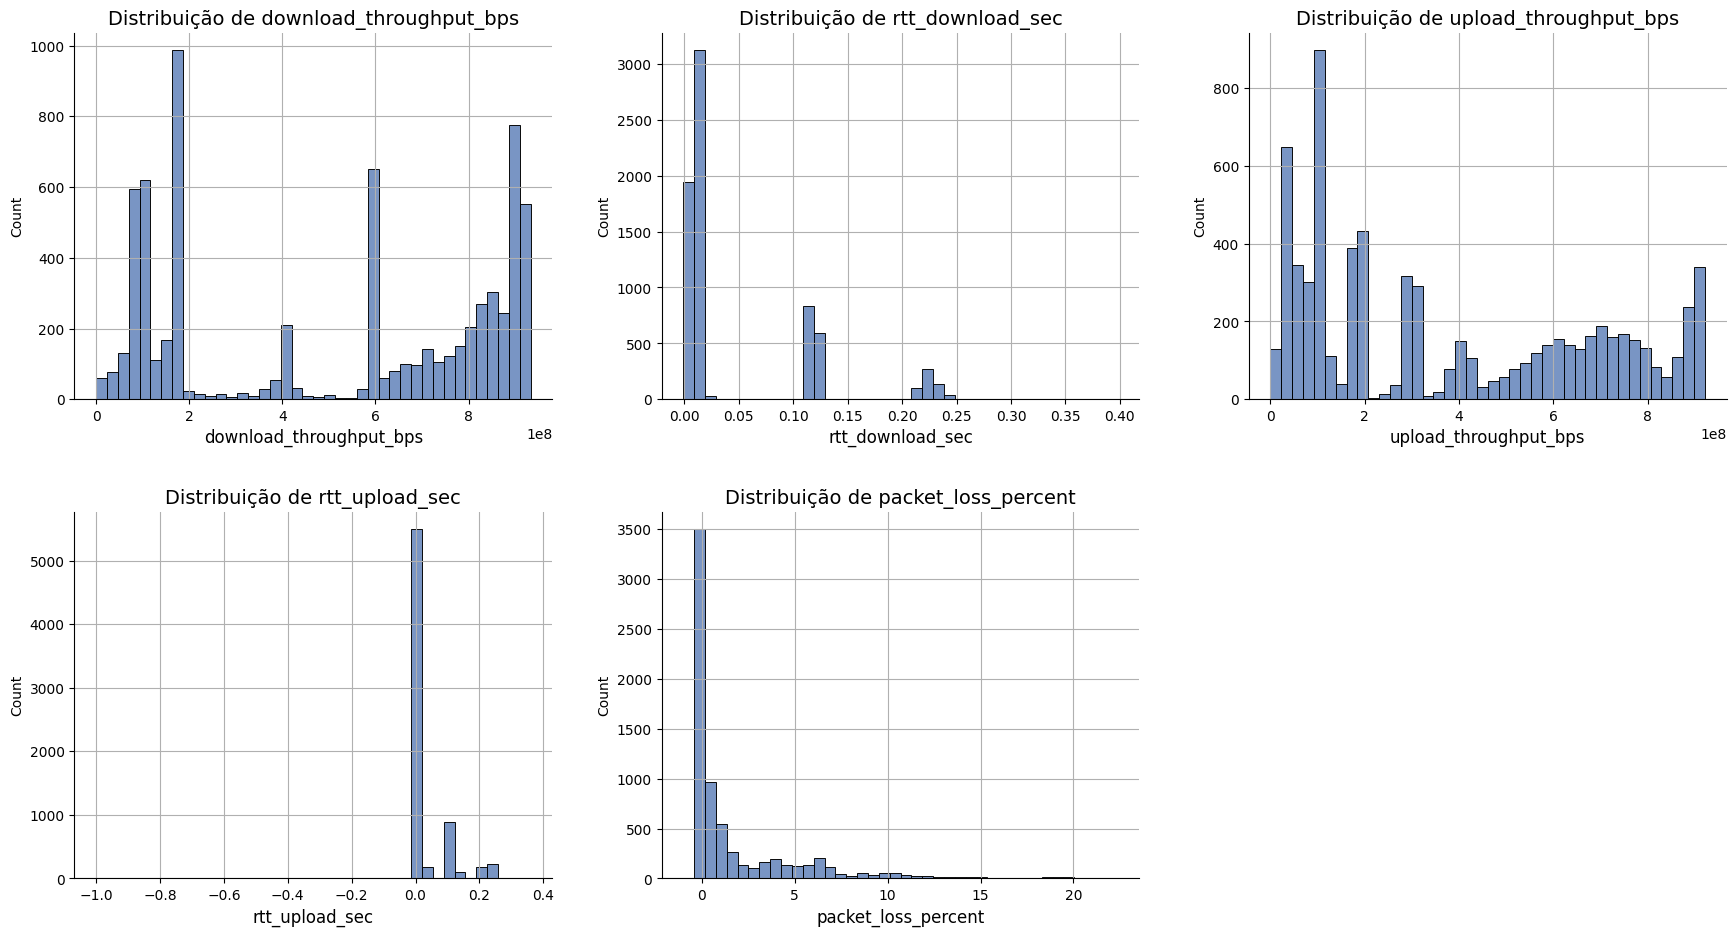

In [6]:
nrows = 2
ncols = 3
num_cols = [col for col in [col for col in df.columns if col not in ['timestamp','client', 'server']]]
num_graficos = len(num_cols)
fig, axes = plt.subplots(nrows, ncols, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=40, ax=axes[i])
    axes[i].set_title(f"Distribuição de {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
if num_graficos < nrows * ncols:
    axes[num_graficos].axis('off')
plt.tight_layout(pad=3.0)
savefig(FIG_DIR, 'histogram_full.png')
plt.show()

Análise geral dos histogramas para o dataset separado por servidores.

Figura salva: ../figures/eda/histogram_server06.png


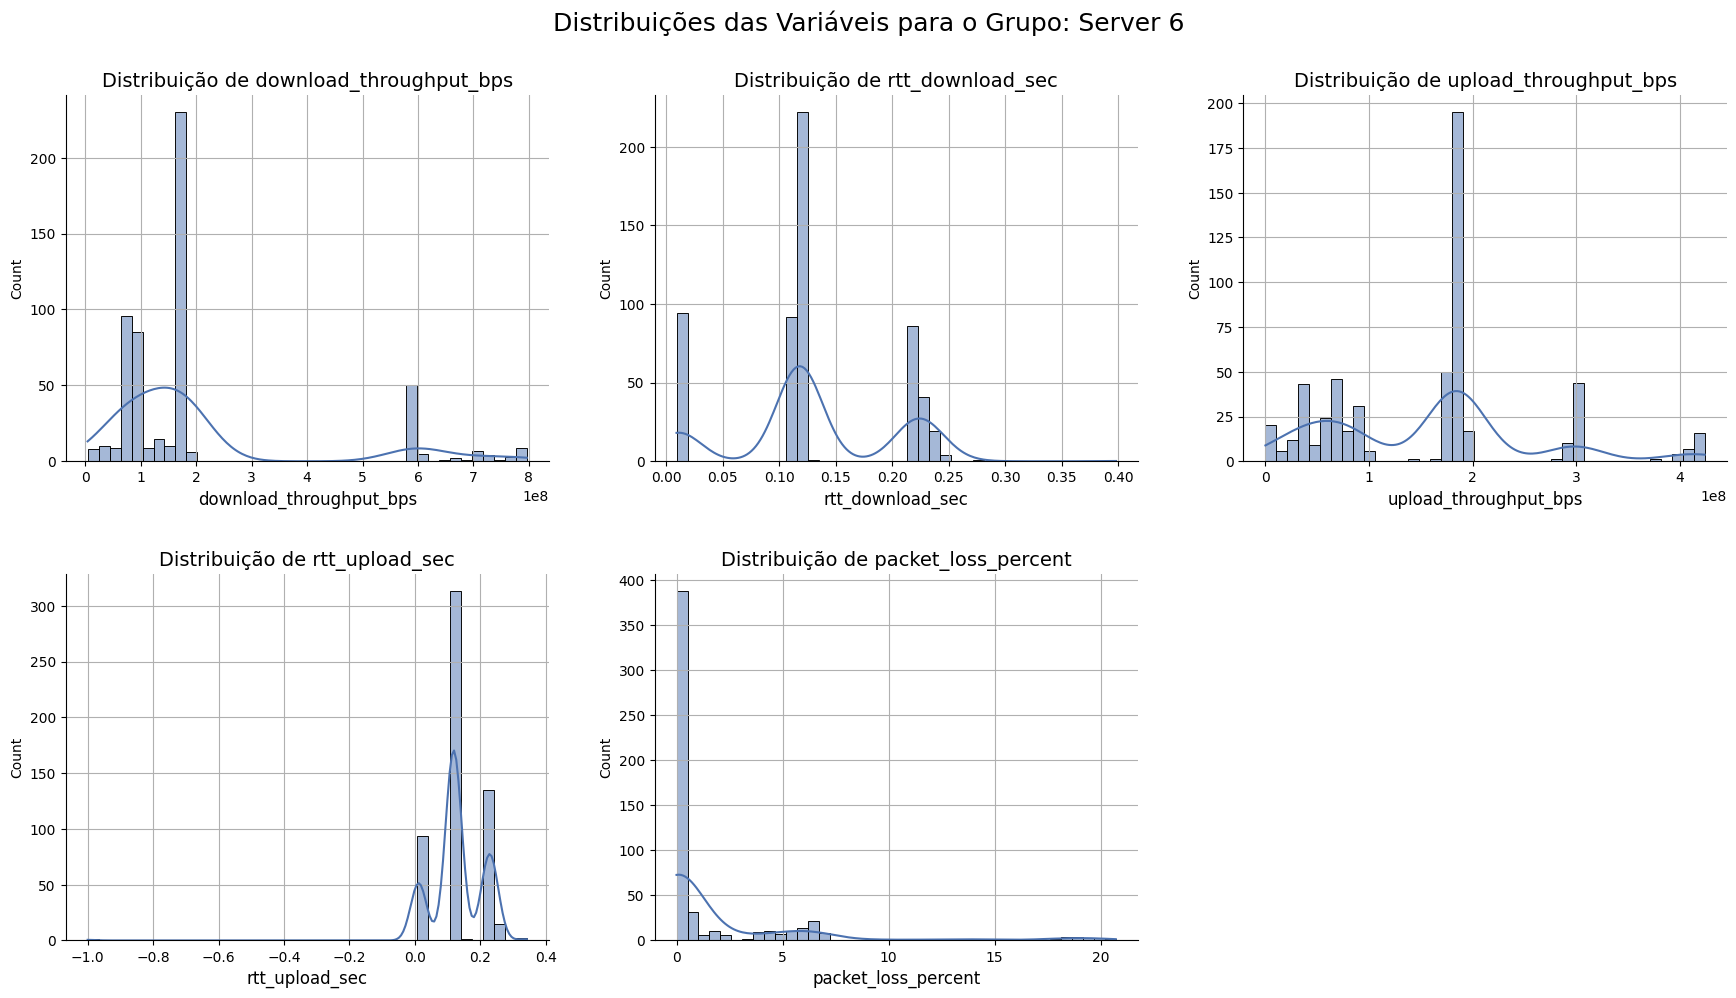

Figura salva: ../figures/eda/histogram_server07.png


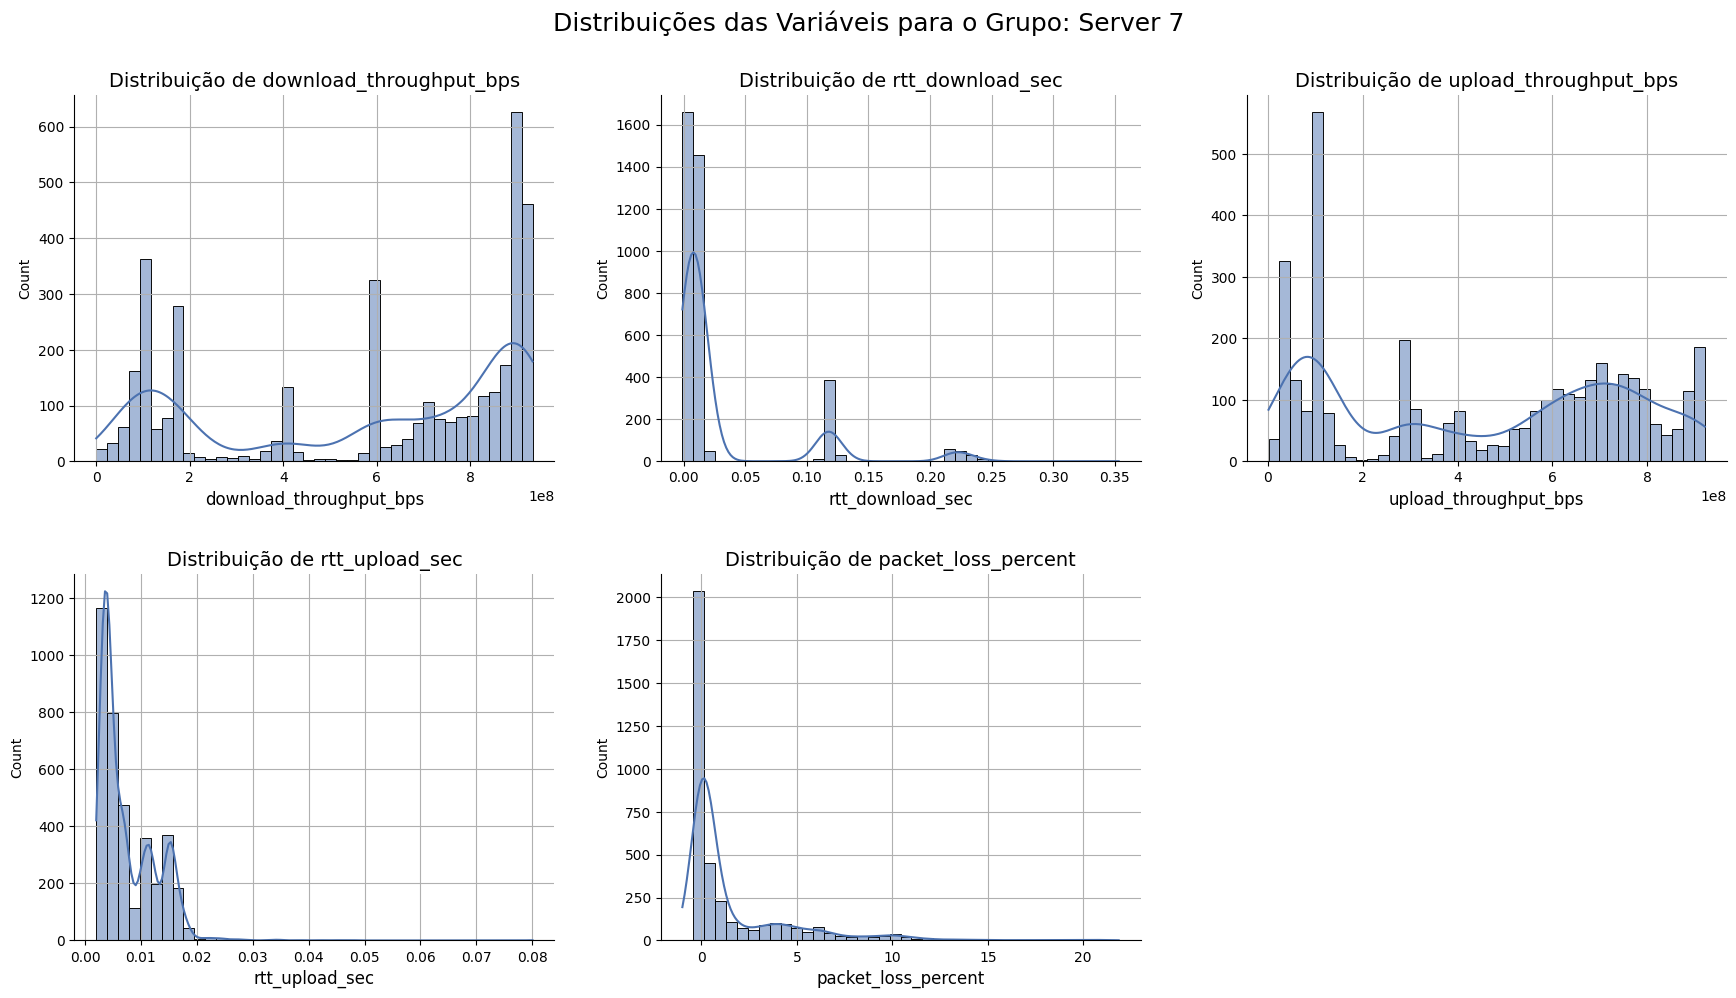

Figura salva: ../figures/eda/histogram_server03.png


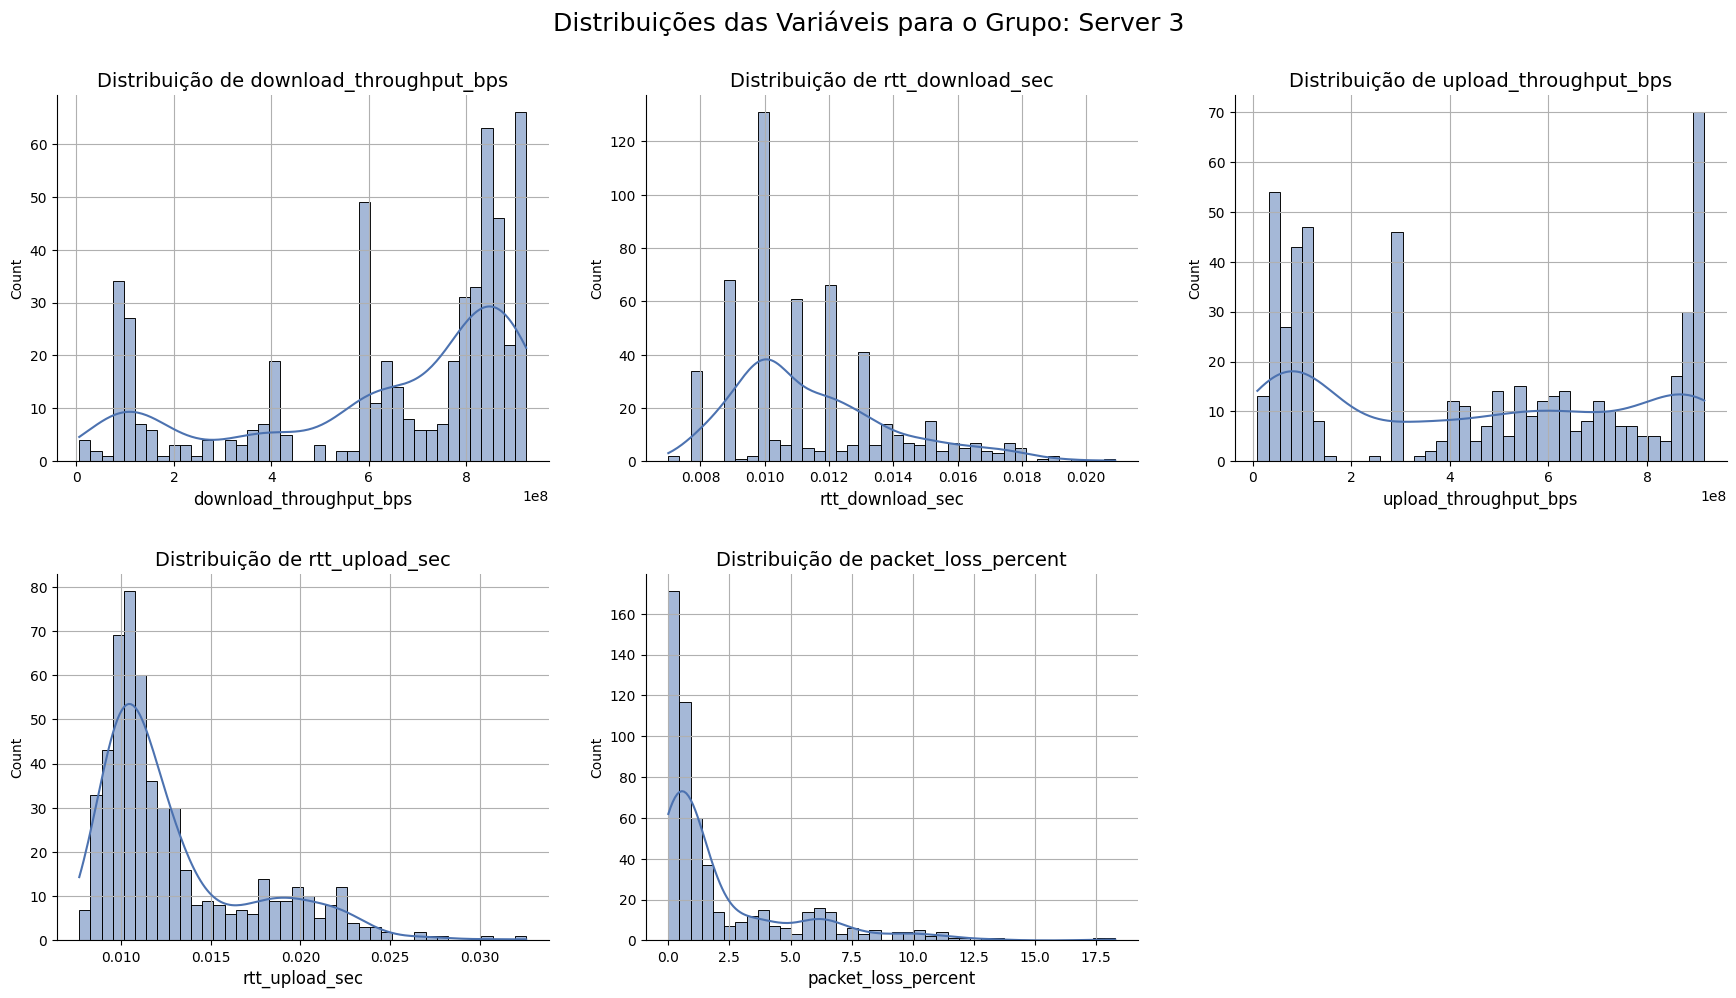

Figura salva: ../figures/eda/histogram_server02.png


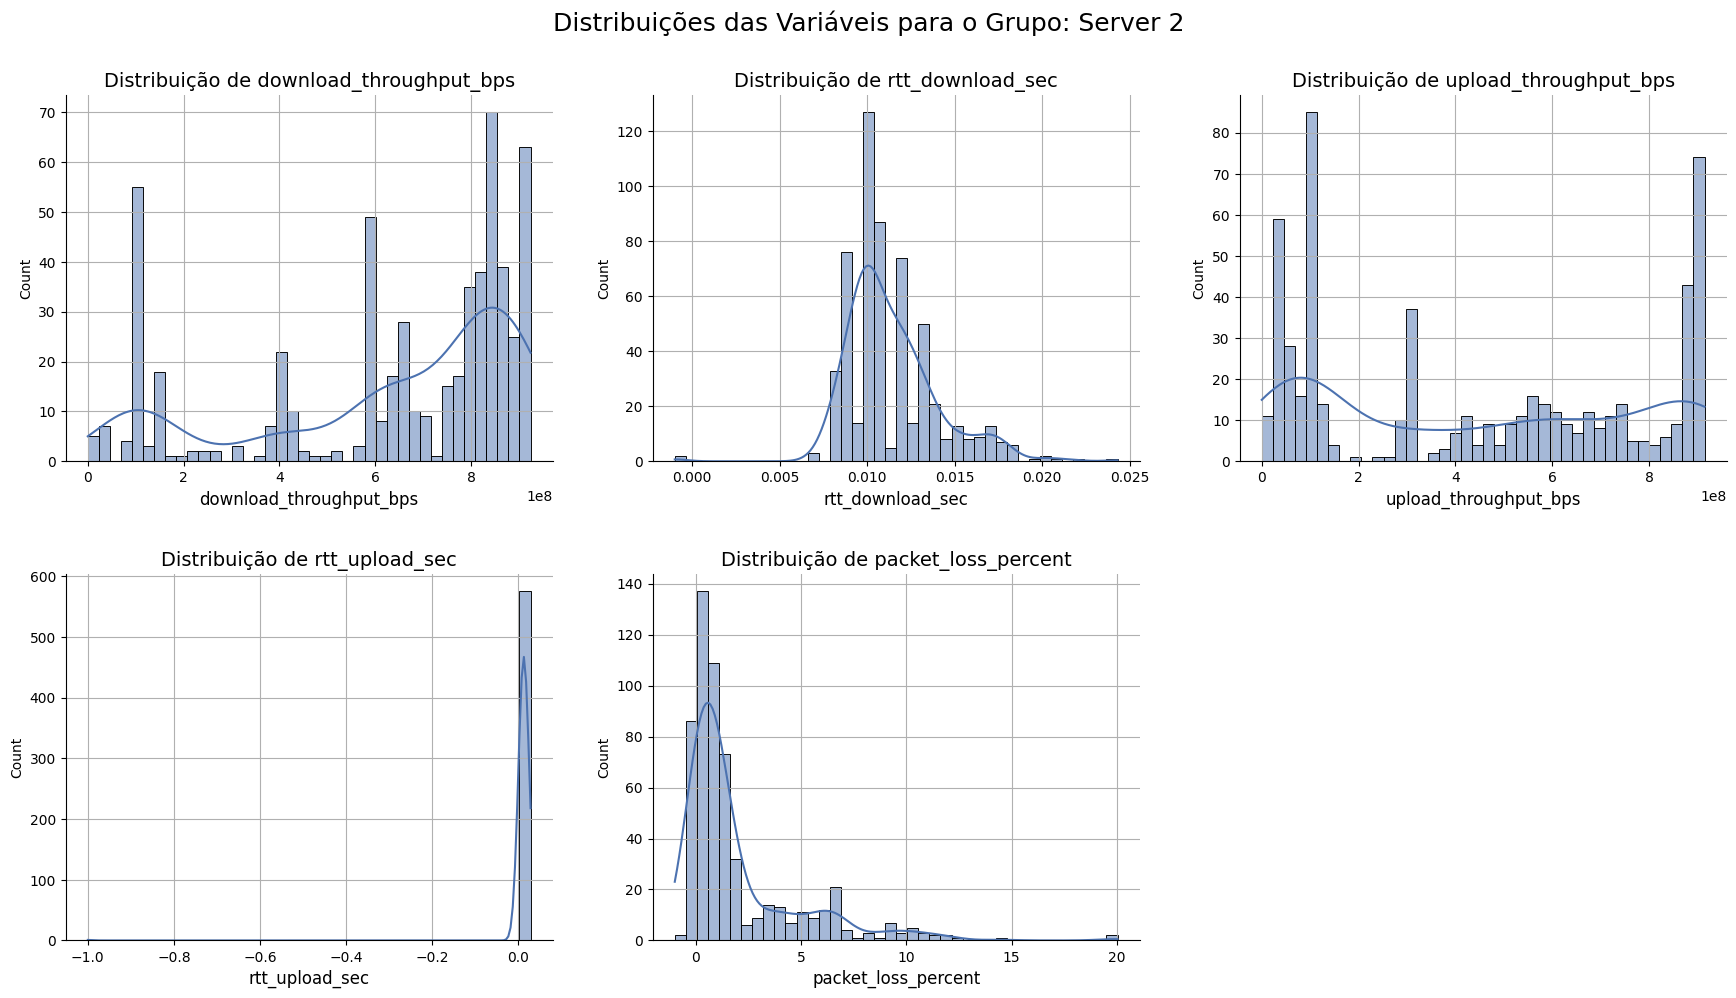

Figura salva: ../figures/eda/histogram_server05.png


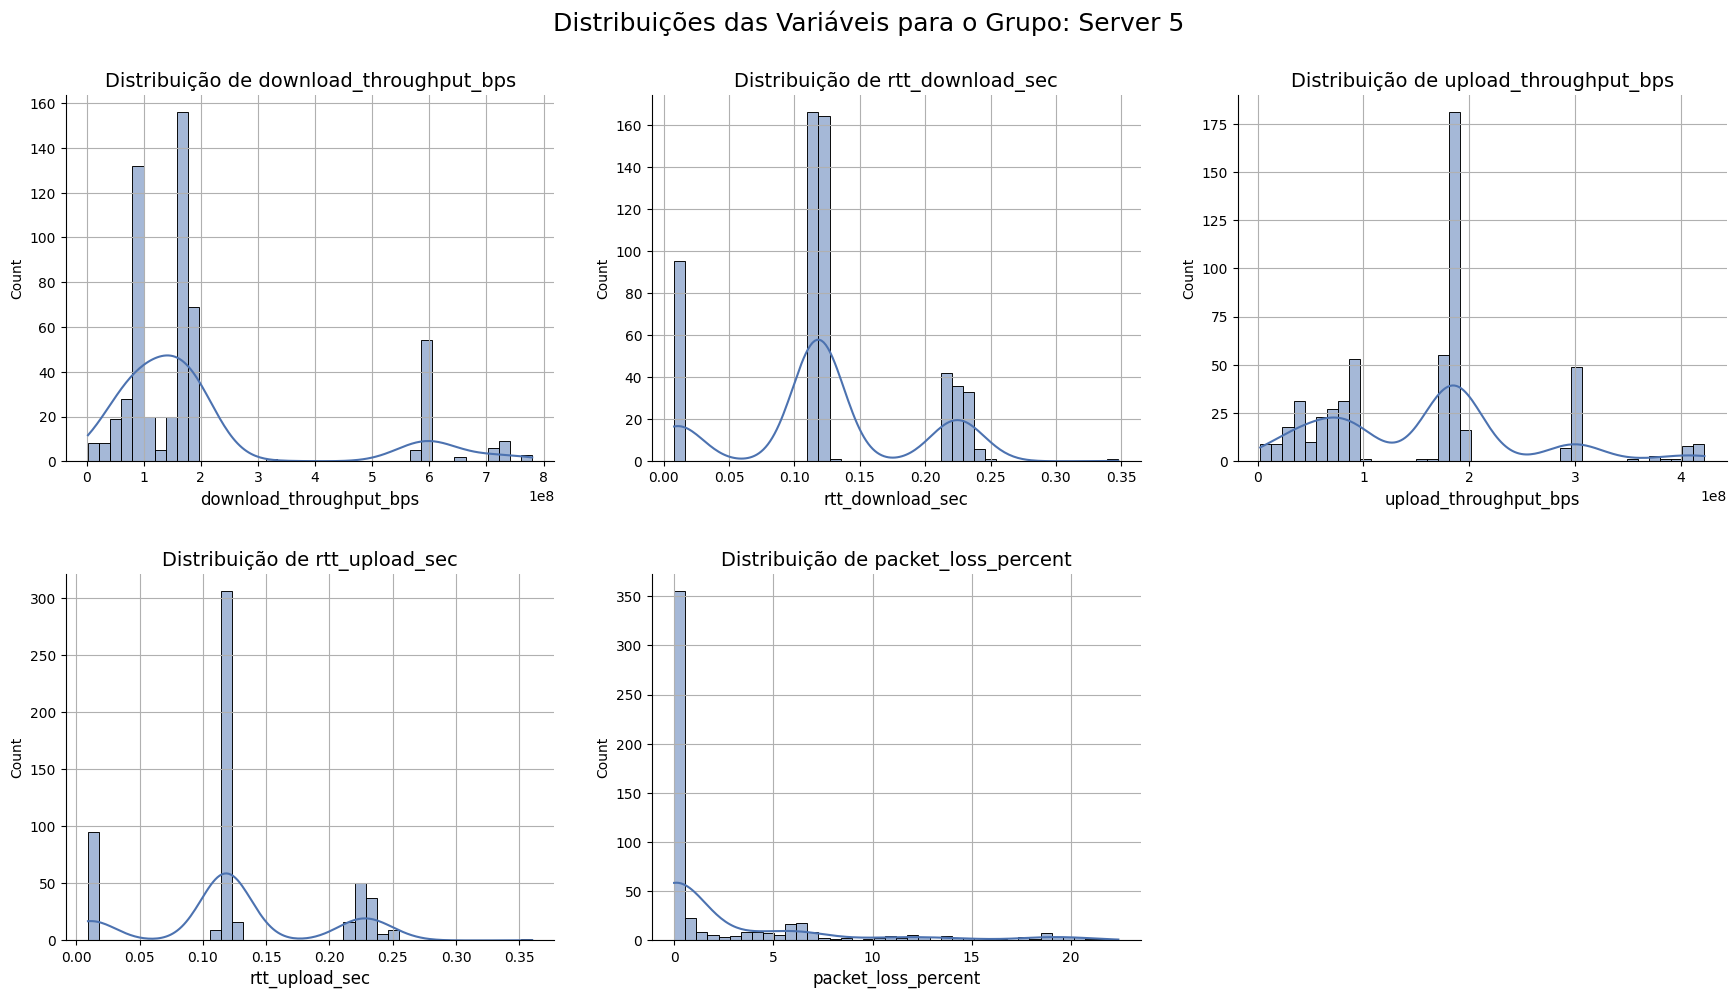

Figura salva: ../figures/eda/histogram_server01.png


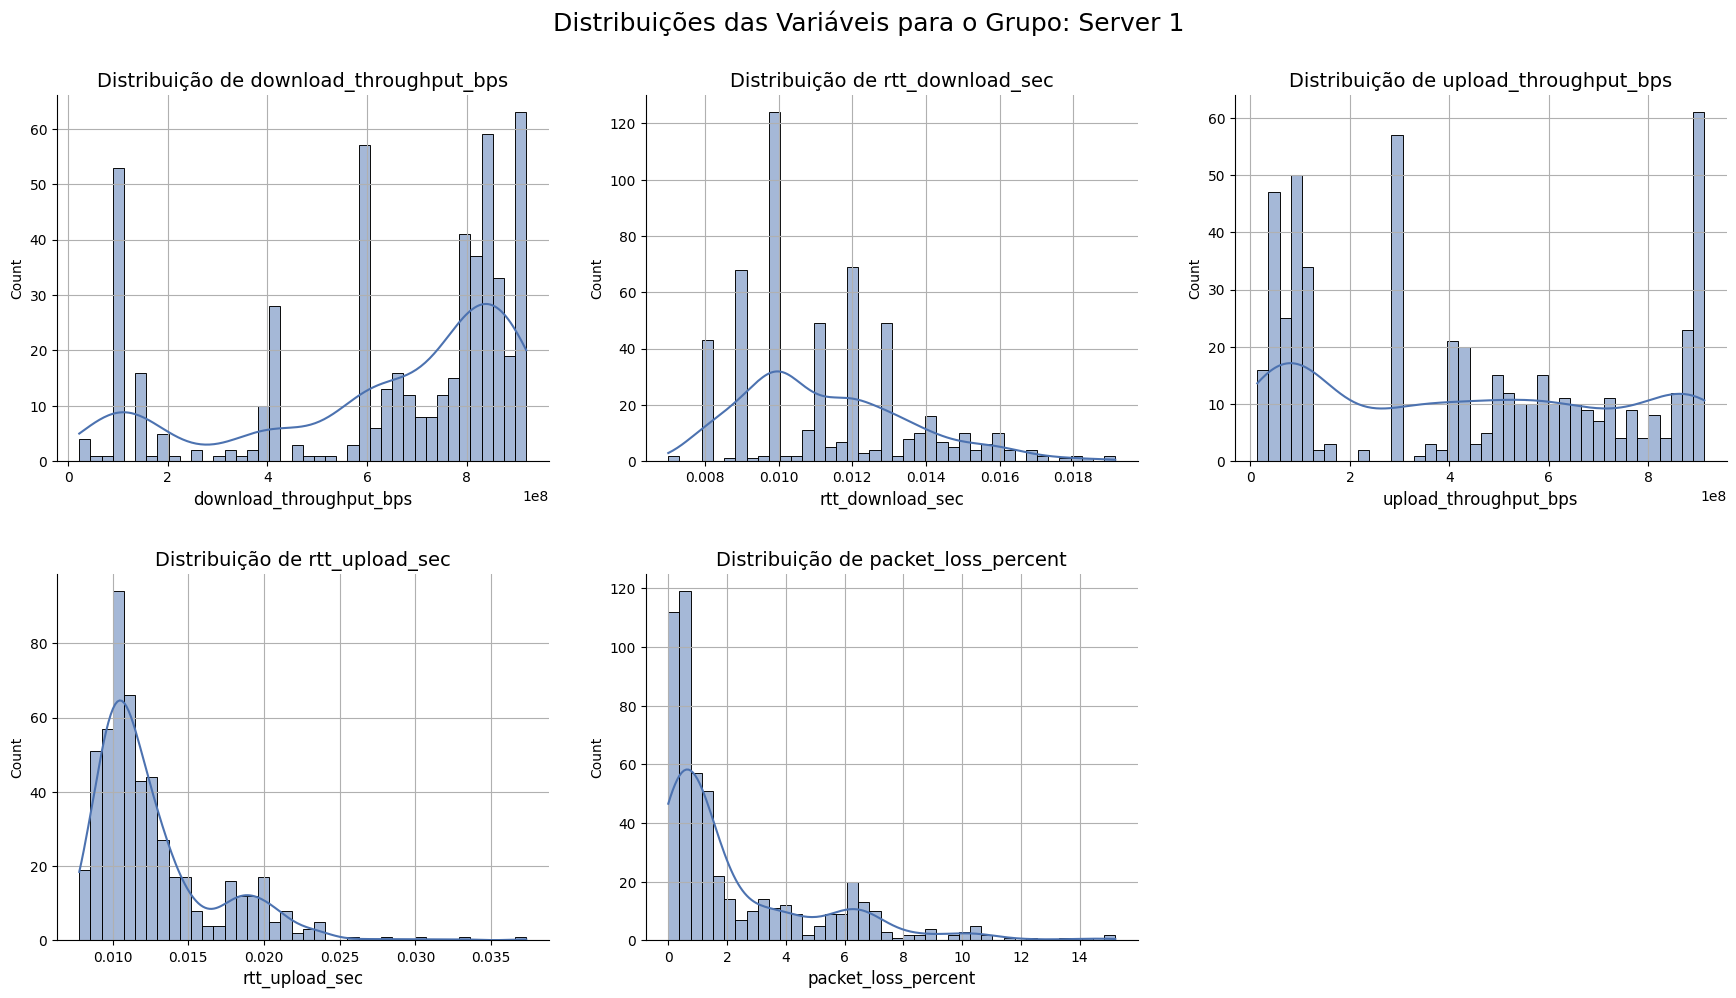

Figura salva: ../figures/eda/histogram_server04.png


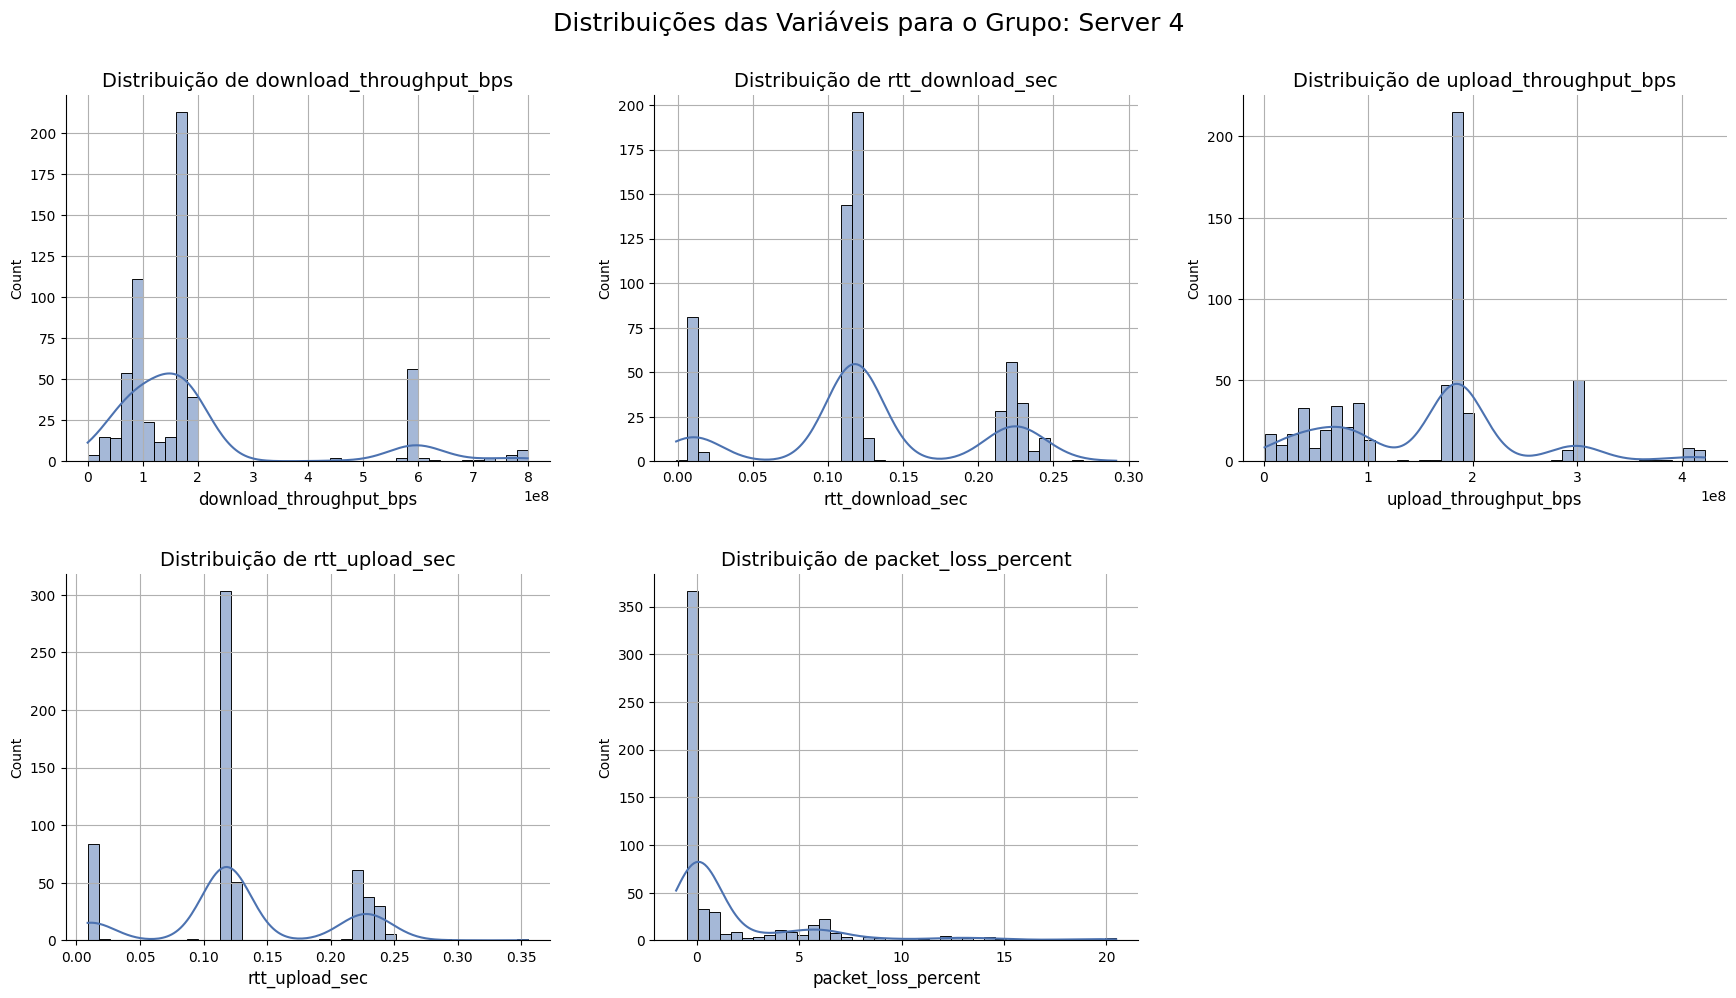

Geração de todas as figuras por grupo concluída.


In [7]:
client_col = 'client'; server_col = 'server'
GROUPING_COL = server_col 
group_values = df[GROUPING_COL].unique()

nrows = 2; ncols = 3
num_graficos = len(num_cols)

def format_group_name(raw_name):
    """
    Converte nomes de grupo como 'server01' para 'Server 1'.
    
    Args:
        raw_name (str): O nome original do grupo (ex: 'server01', 'client10').
    
    Returns:
        str: O nome formatado (ex: 'Server 1', 'Client 10').
    """
    raw_name = str(raw_name)
    if raw_name.lower().startswith('server'):
        prefix = 'Server'
        number = raw_name.lower().replace('server', '').lstrip('0')
    elif raw_name.lower().startswith('client'):
        prefix = 'Client'
        number = raw_name.lower().replace('client', '').lstrip('0')
    else:
        return raw_name.replace(" ", "_").replace("/", "-")
    return f"{prefix} {number}"

for group_name in group_values:
    df_filtered = df[df[GROUPING_COL] == group_name]
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 10))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.histplot(df_filtered[col], bins=40, ax=axes[i], kde=True)
        axes[i].set_title(f"Distribuição de {col}", fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)

    if num_graficos < nrows * ncols:
        axes[num_graficos].axis('off')
        
    plt.tight_layout(pad=3.0)
    formatted_name = format_group_name(group_name)
    fig.suptitle(f'Distribuições das Variáveis para o Grupo: {formatted_name}', fontsize=18, y=1.02)

    safe_name = str(group_name).replace(" ", "_").replace("/", "-")
    filename = f"histogram_{safe_name}.png"
    savefig(FIG_DIR, filename, dpi=600) 
    plt.show()
    plt.close(fig)

print("Geração de todas as figuras por grupo concluída.")

Análise comparativa dos histogramas para os servidores 06 e 07.

Figura salva: ../figures/eda/histogram_server_group.png


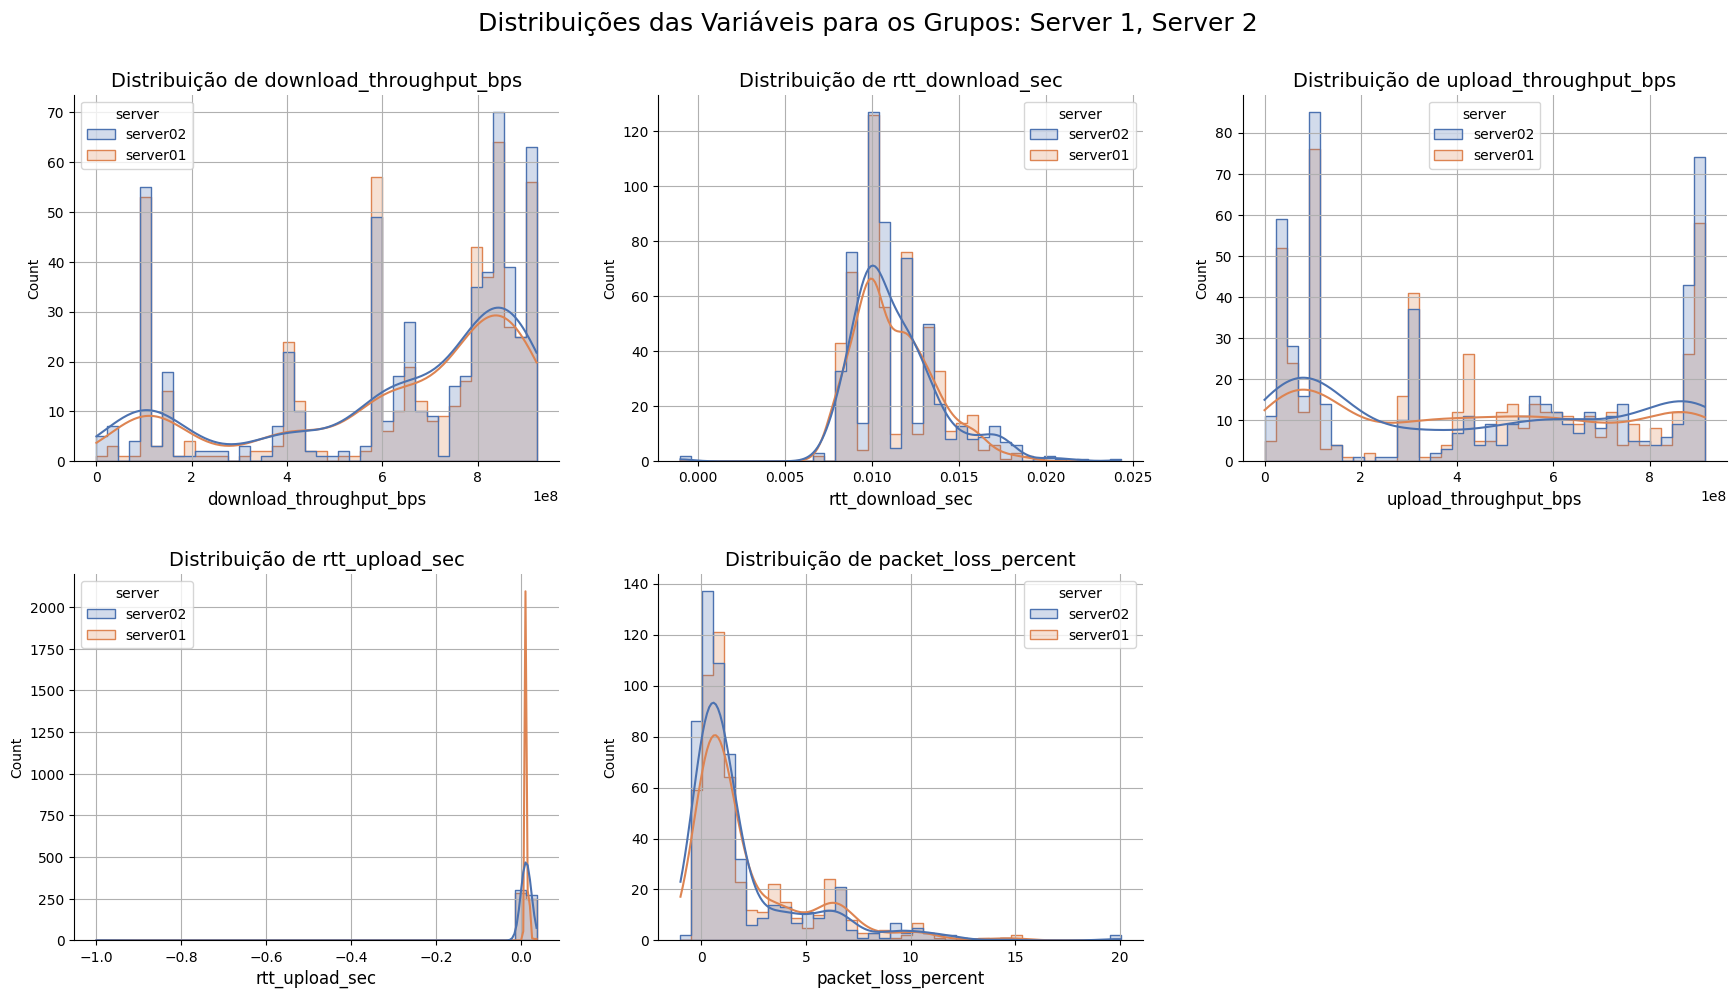

In [8]:
CATEGORICAL_FILTER = 'server' 
FILTRO_CATEGORIAS = ['server01', 'server02'] 
df_filtrado = df[df[CATEGORICAL_FILTER].isin(FILTRO_CATEGORIAS)]
FILTRO_CATEGORIAS_DISPLAY = [format_group_name(g) for g in FILTRO_CATEGORIAS]

nrows = 2; ncols = 3
num_graficos = len(num_cols) 

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data=df_filtrado, x=col, hue=CATEGORICAL_FILTER, bins=40, ax=axes[i], kde=True, element="step")
    axes[i].set_title(f"Distribuição de {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)

if num_graficos < nrows * ncols:
    axes[num_graficos].axis('off')

plt.tight_layout(pad=3.0)
title_groups = ', '.join(FILTRO_CATEGORIAS_DISPLAY)
fig.suptitle(f'Distribuições das Variáveis para os Grupos: {title_groups}',fontsize=18, y=1.02)
filename = f"histogram_server_group.png"
savefig(FIG_DIR, filename, dpi=600) 
plt.show()

Análise geral dos histogramas para o dataset separado por clientes.

Figura salva: ../figures/eda/histogram_client12.png


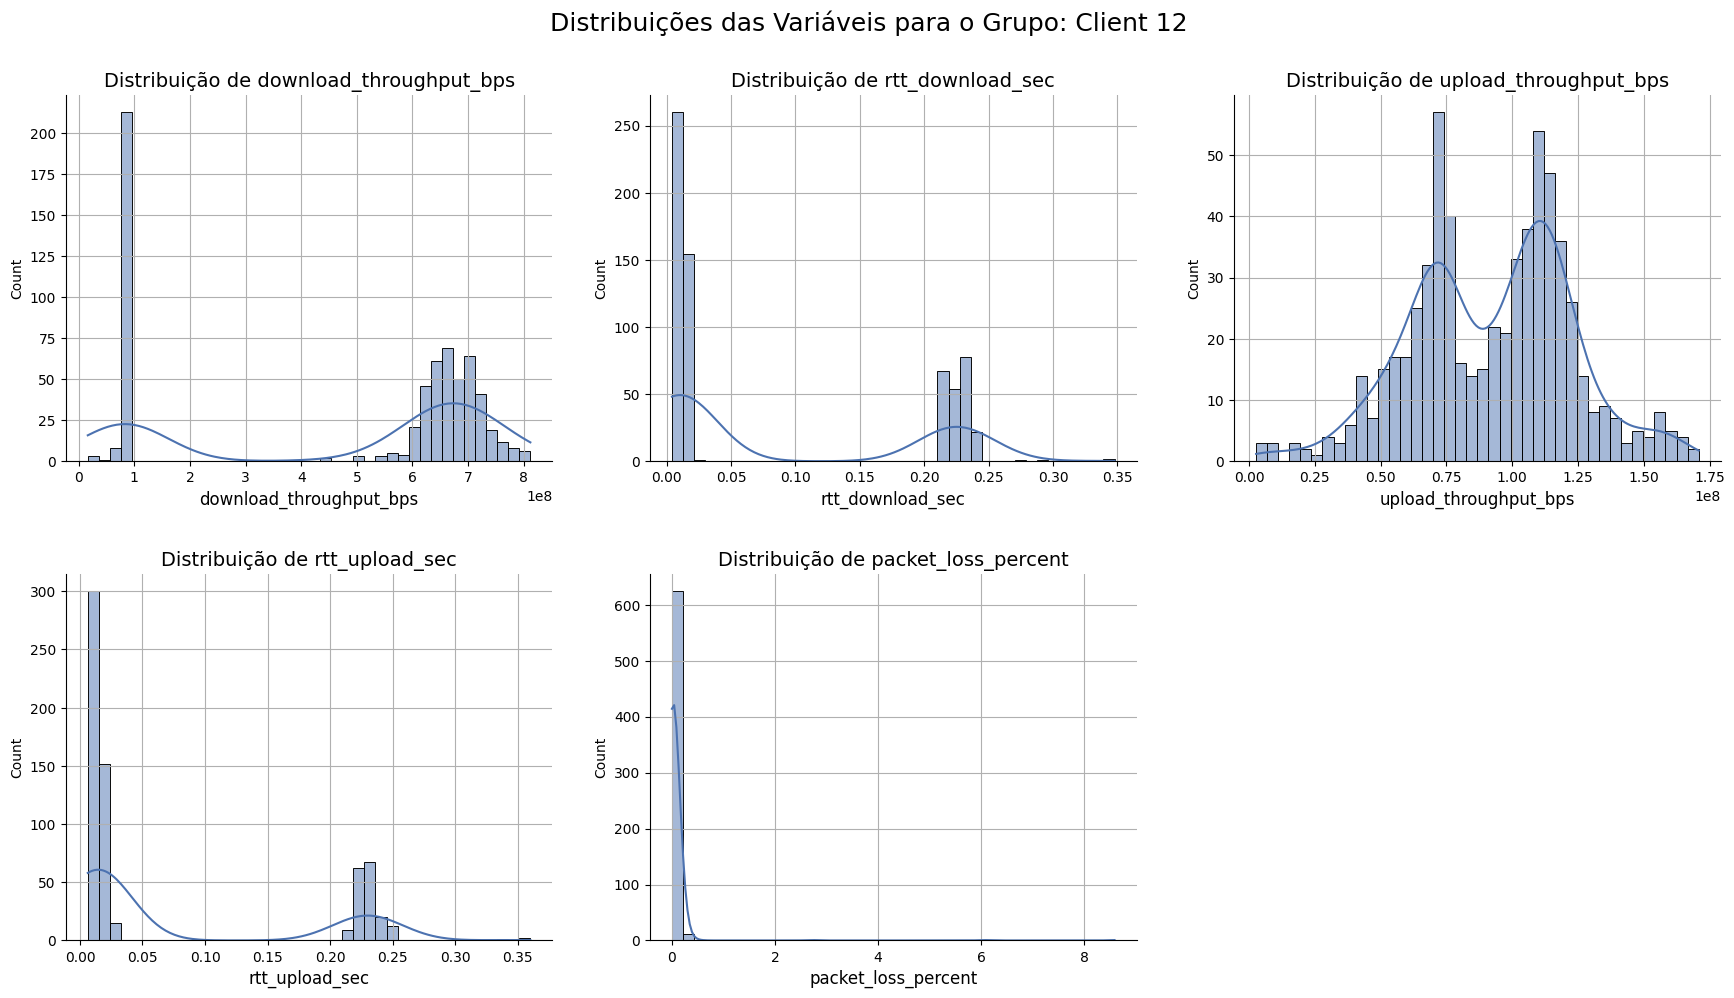

Figura salva: ../figures/eda/histogram_client01.png


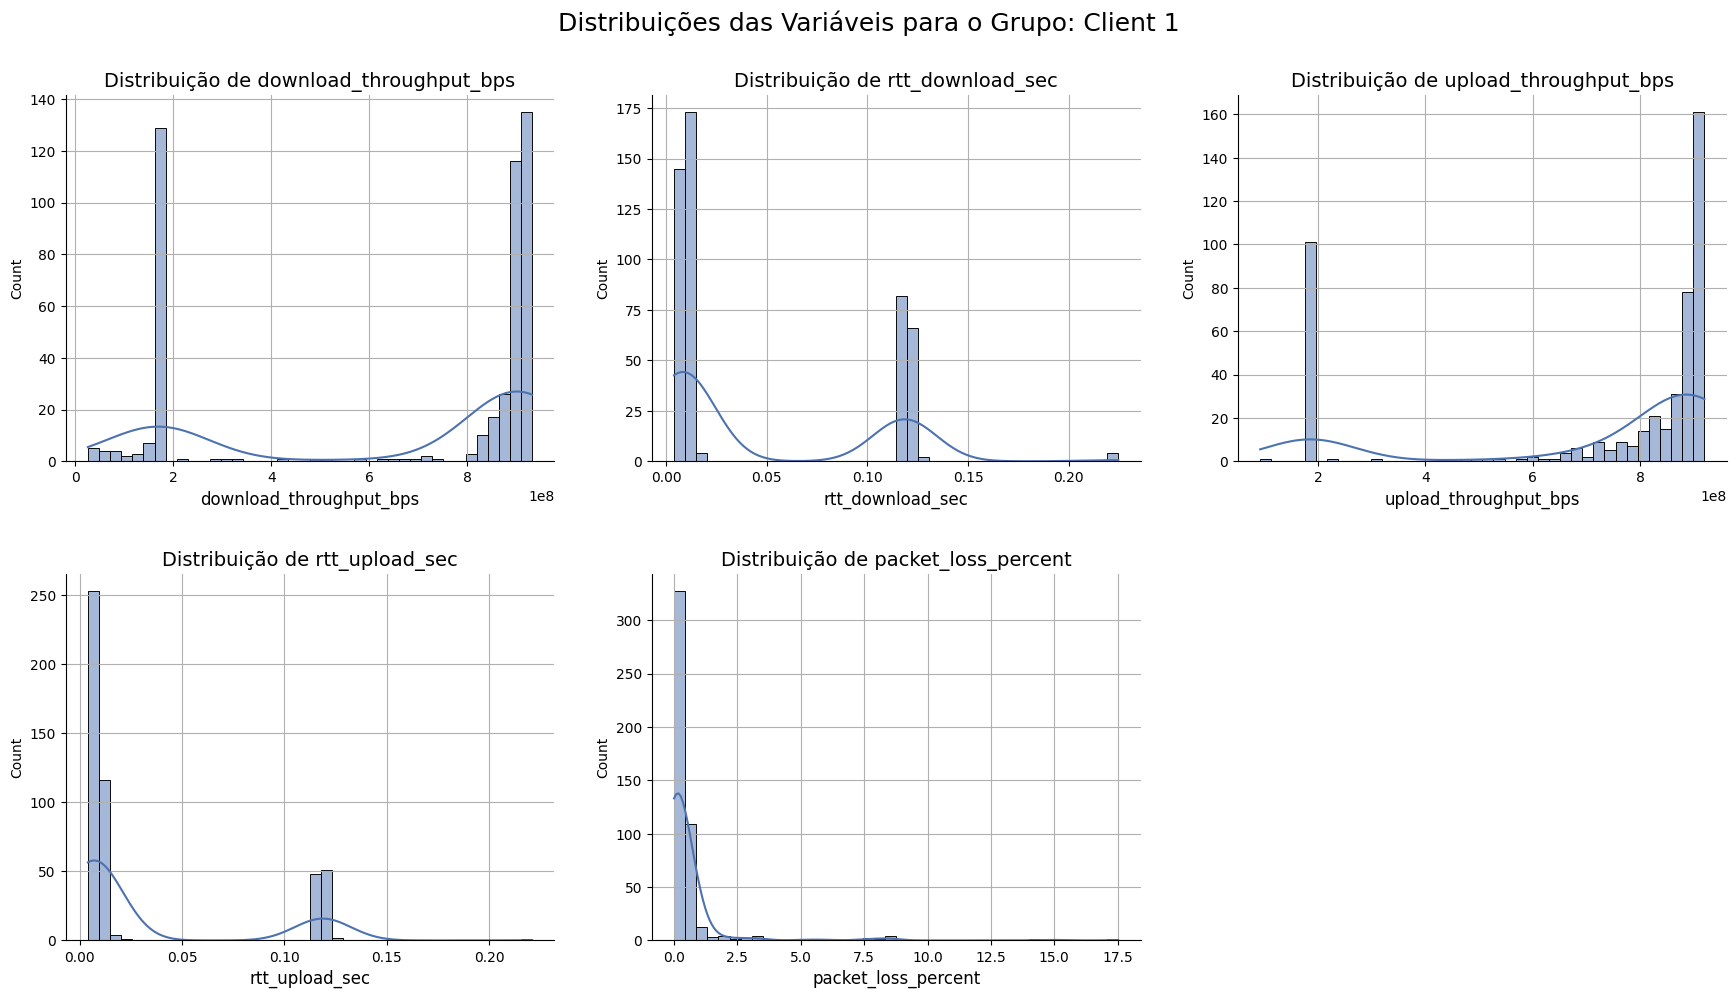

Figura salva: ../figures/eda/histogram_client13.png


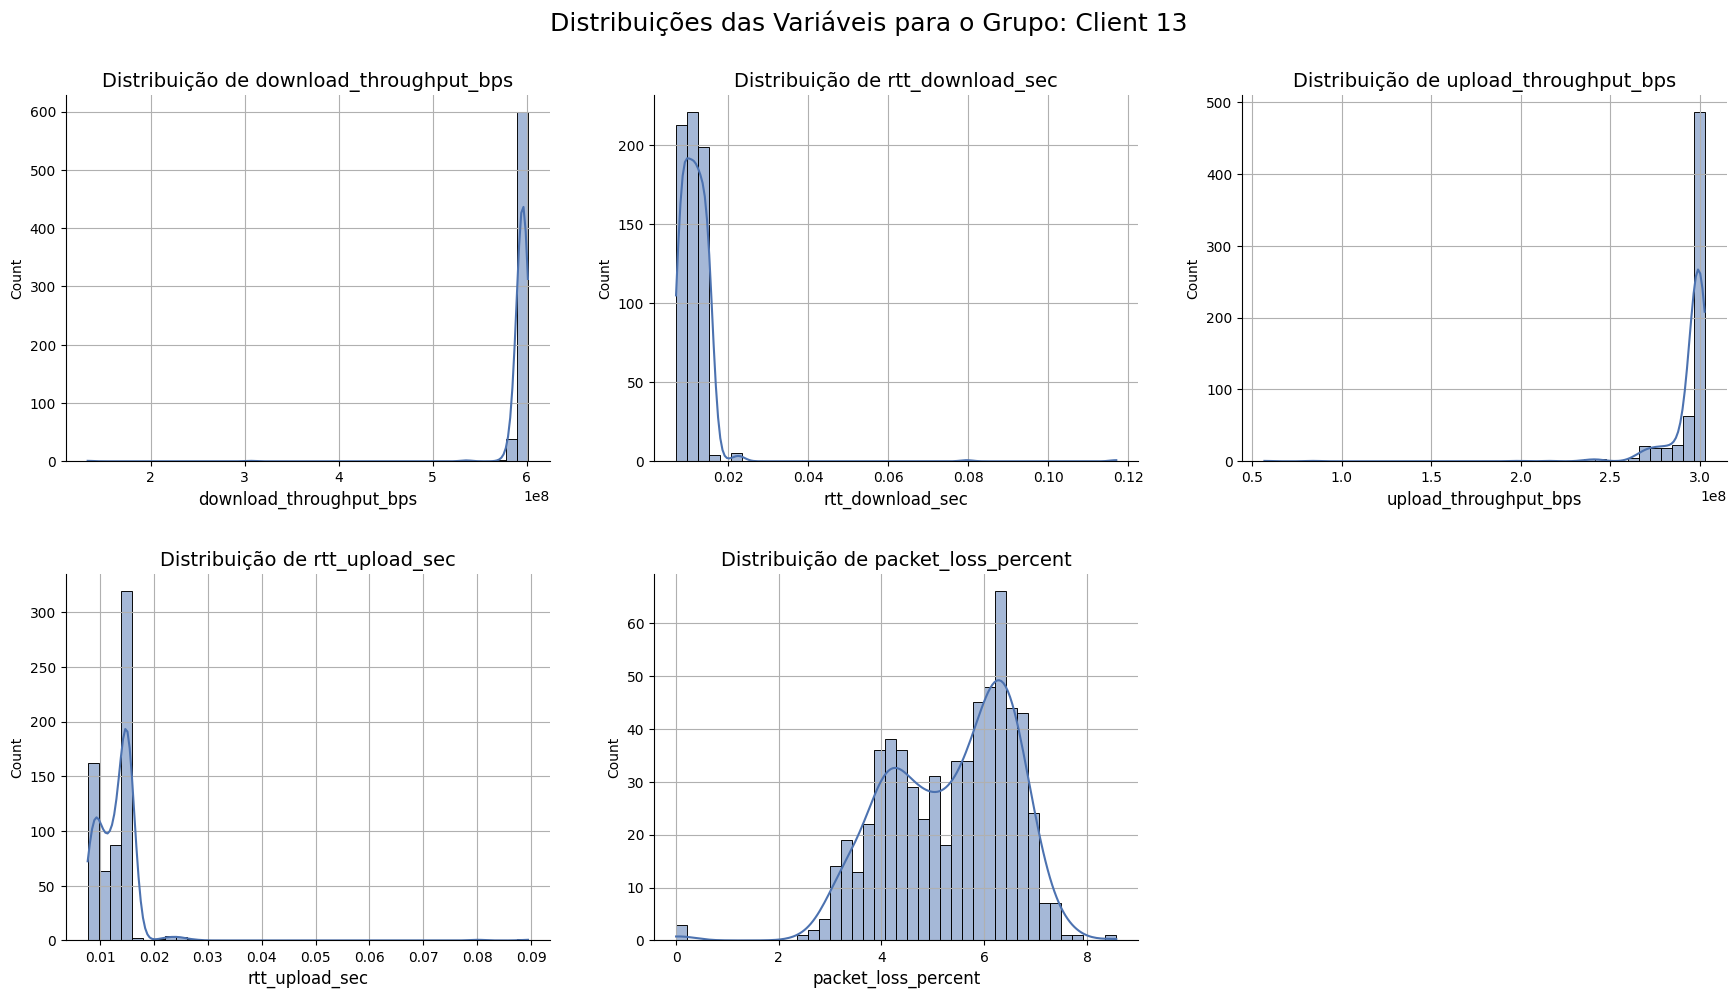

Figura salva: ../figures/eda/histogram_client03.png


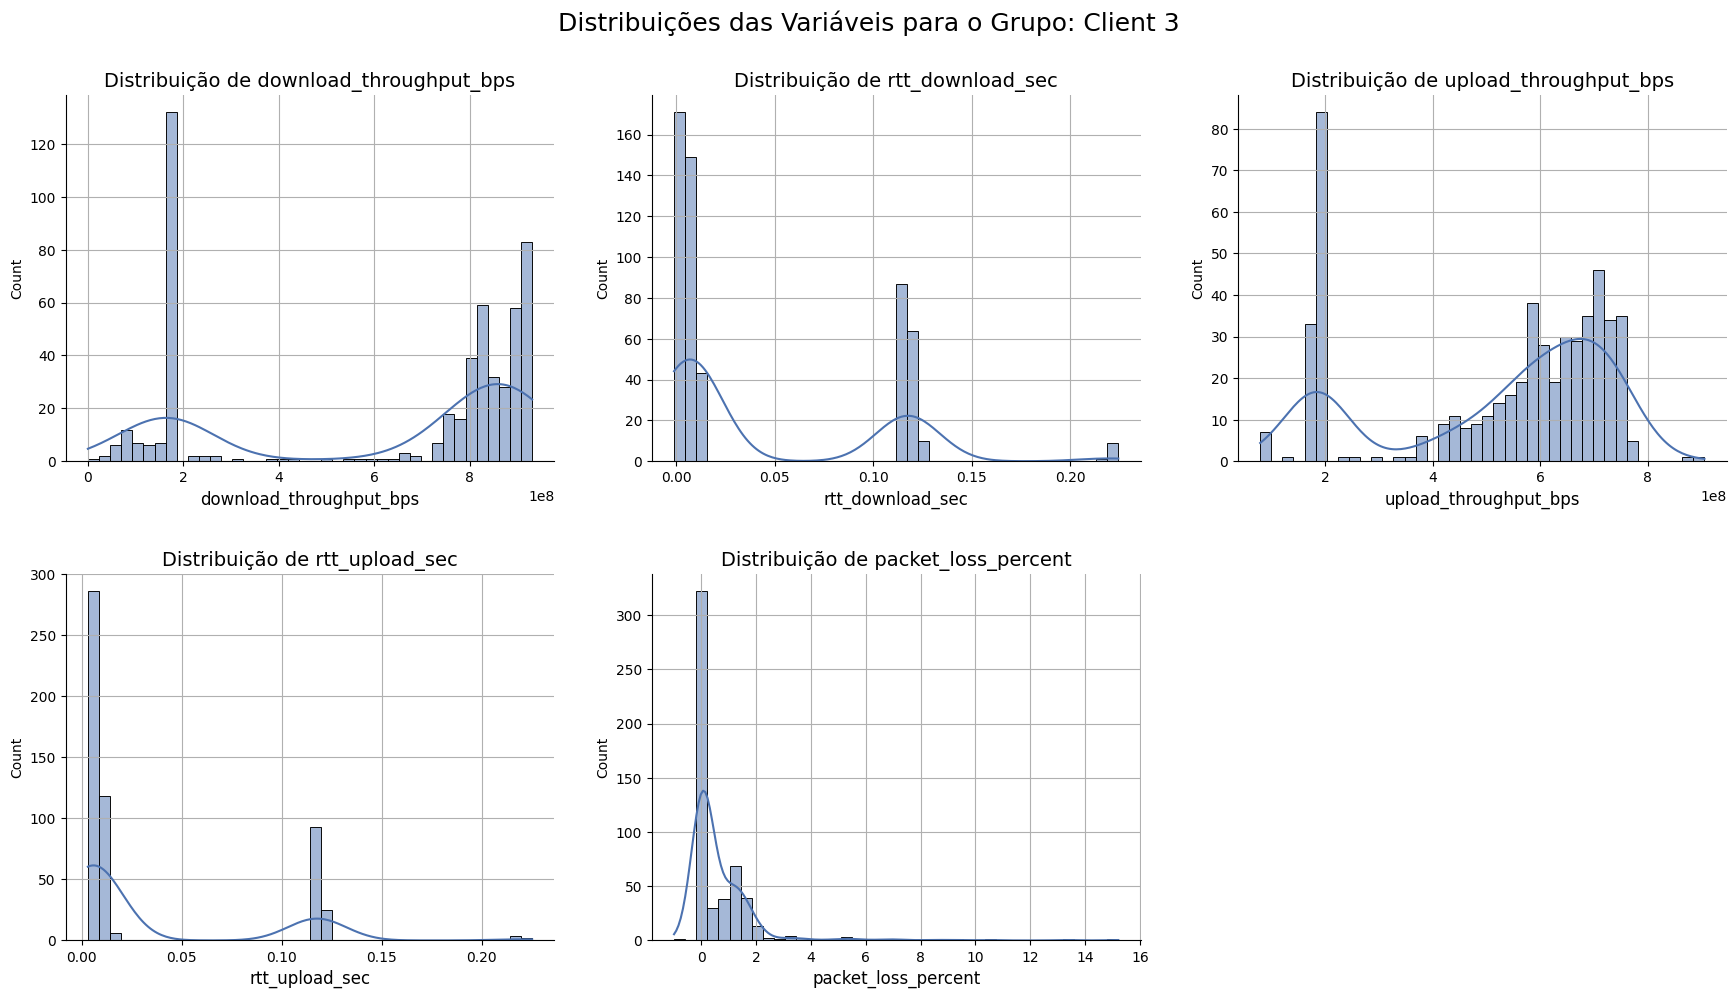

Figura salva: ../figures/eda/histogram_client05.png


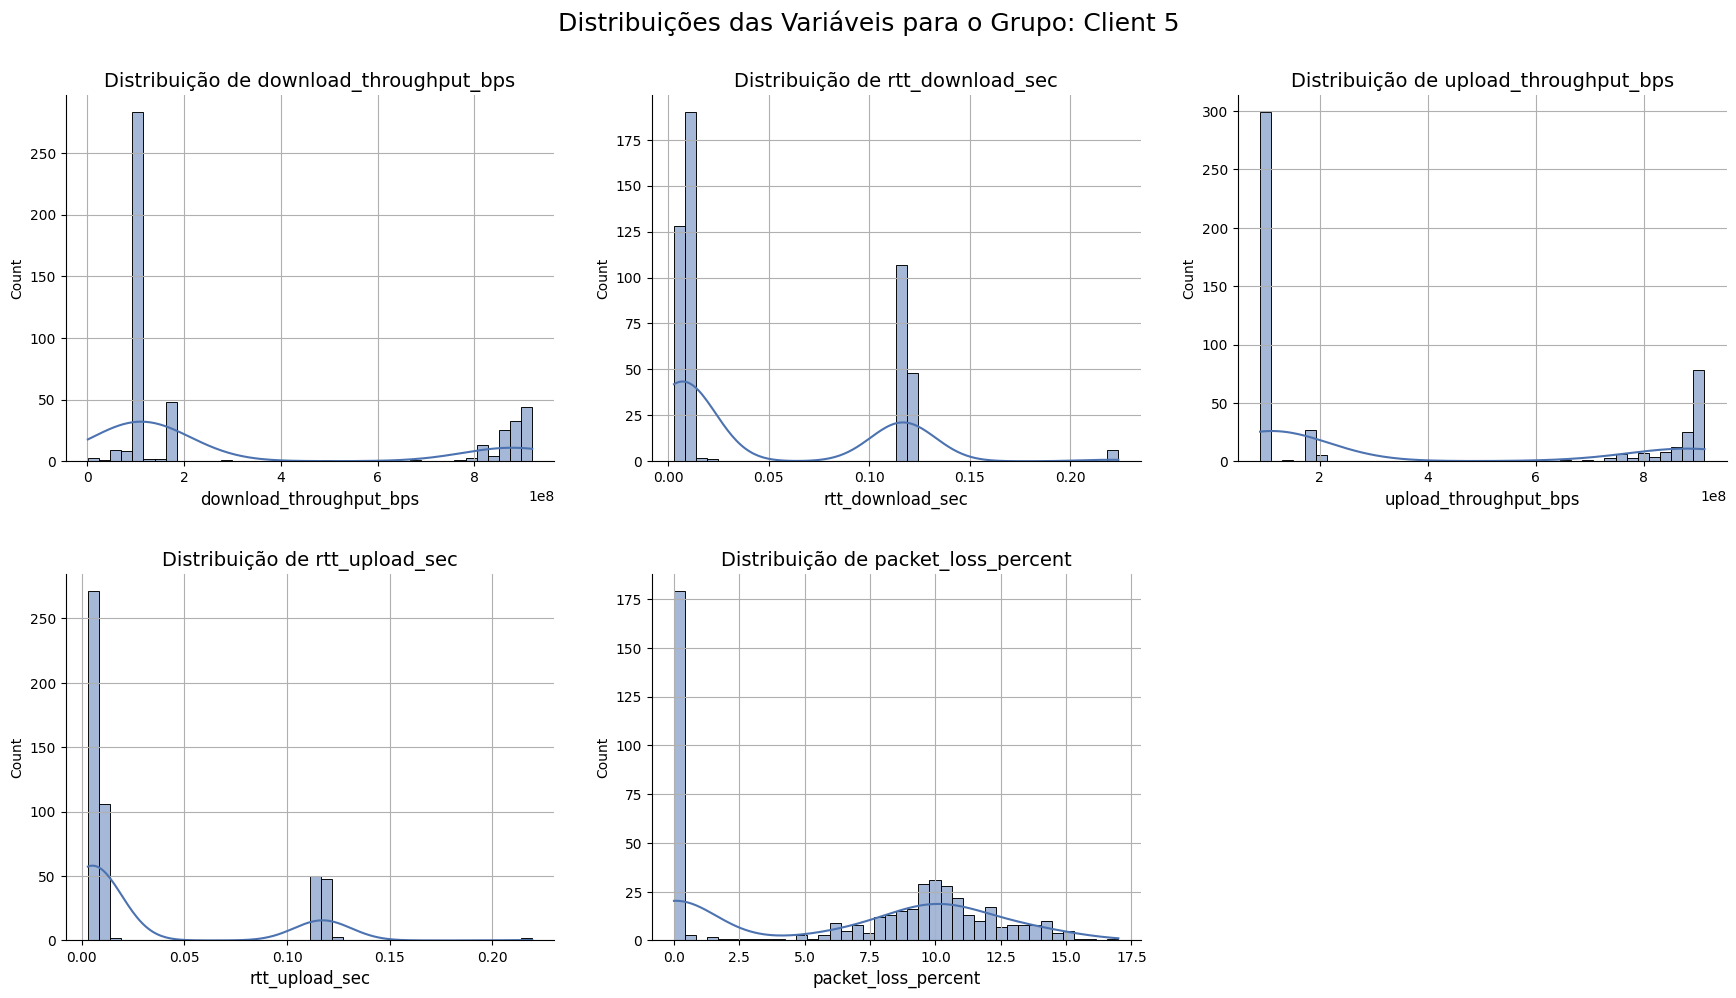

Figura salva: ../figures/eda/histogram_client10.png


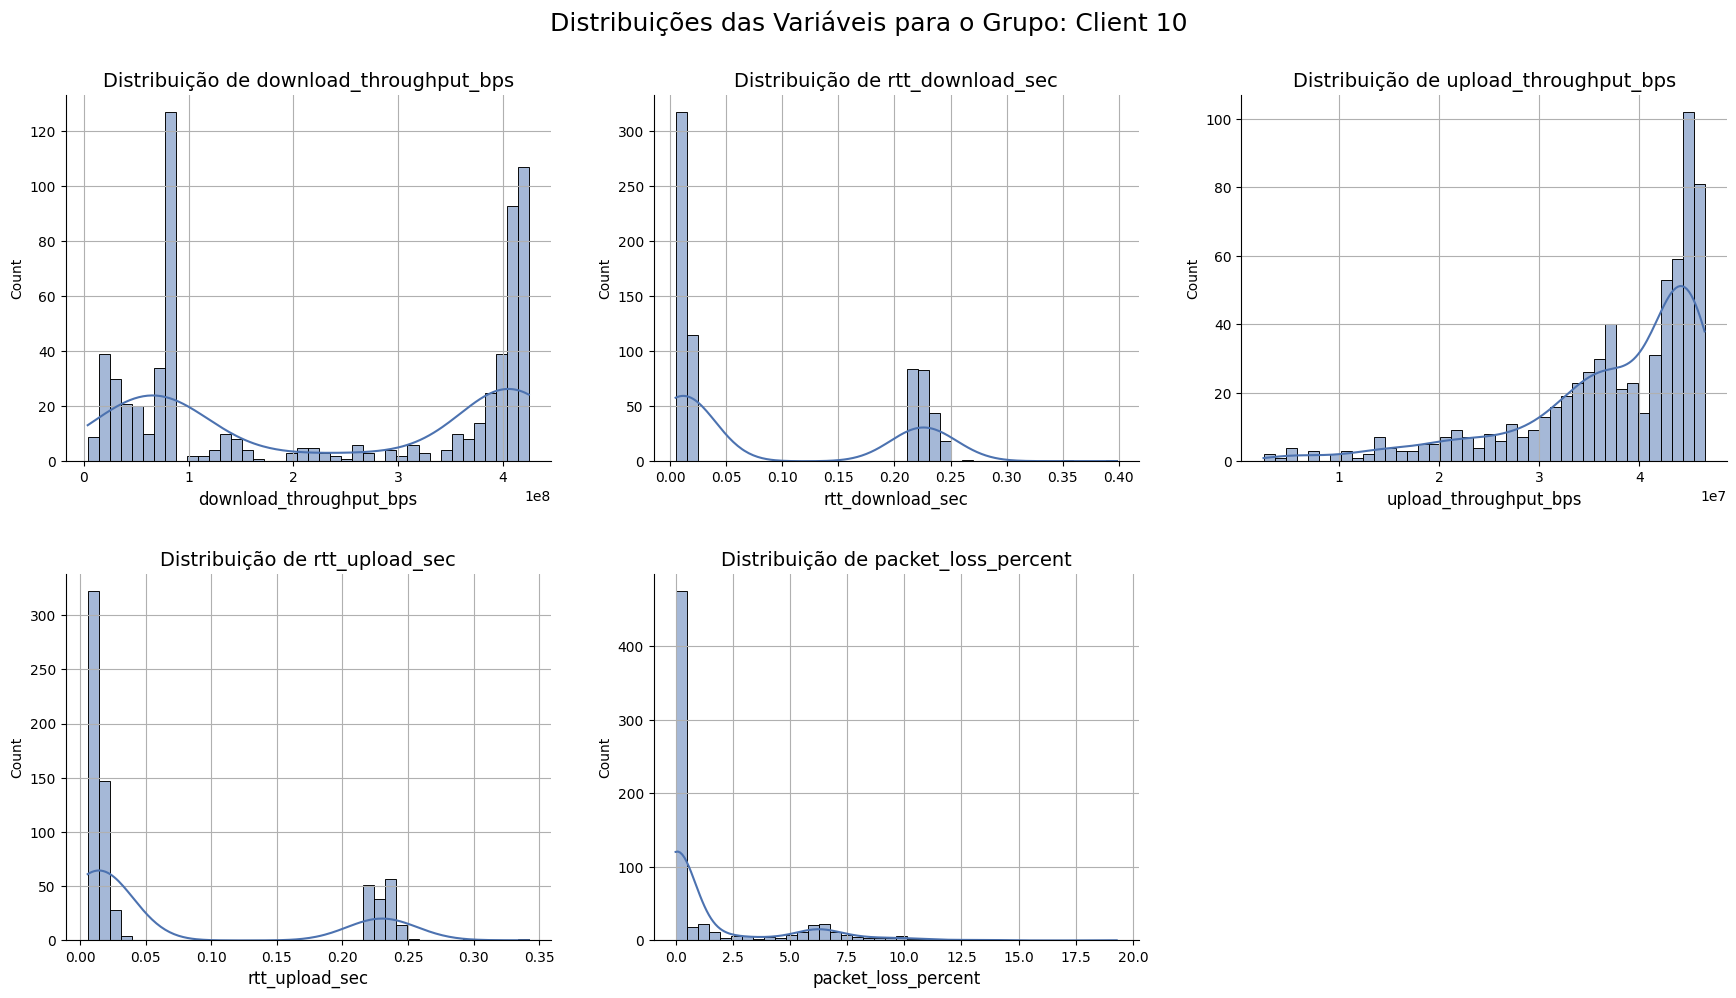

Figura salva: ../figures/eda/histogram_client06.png


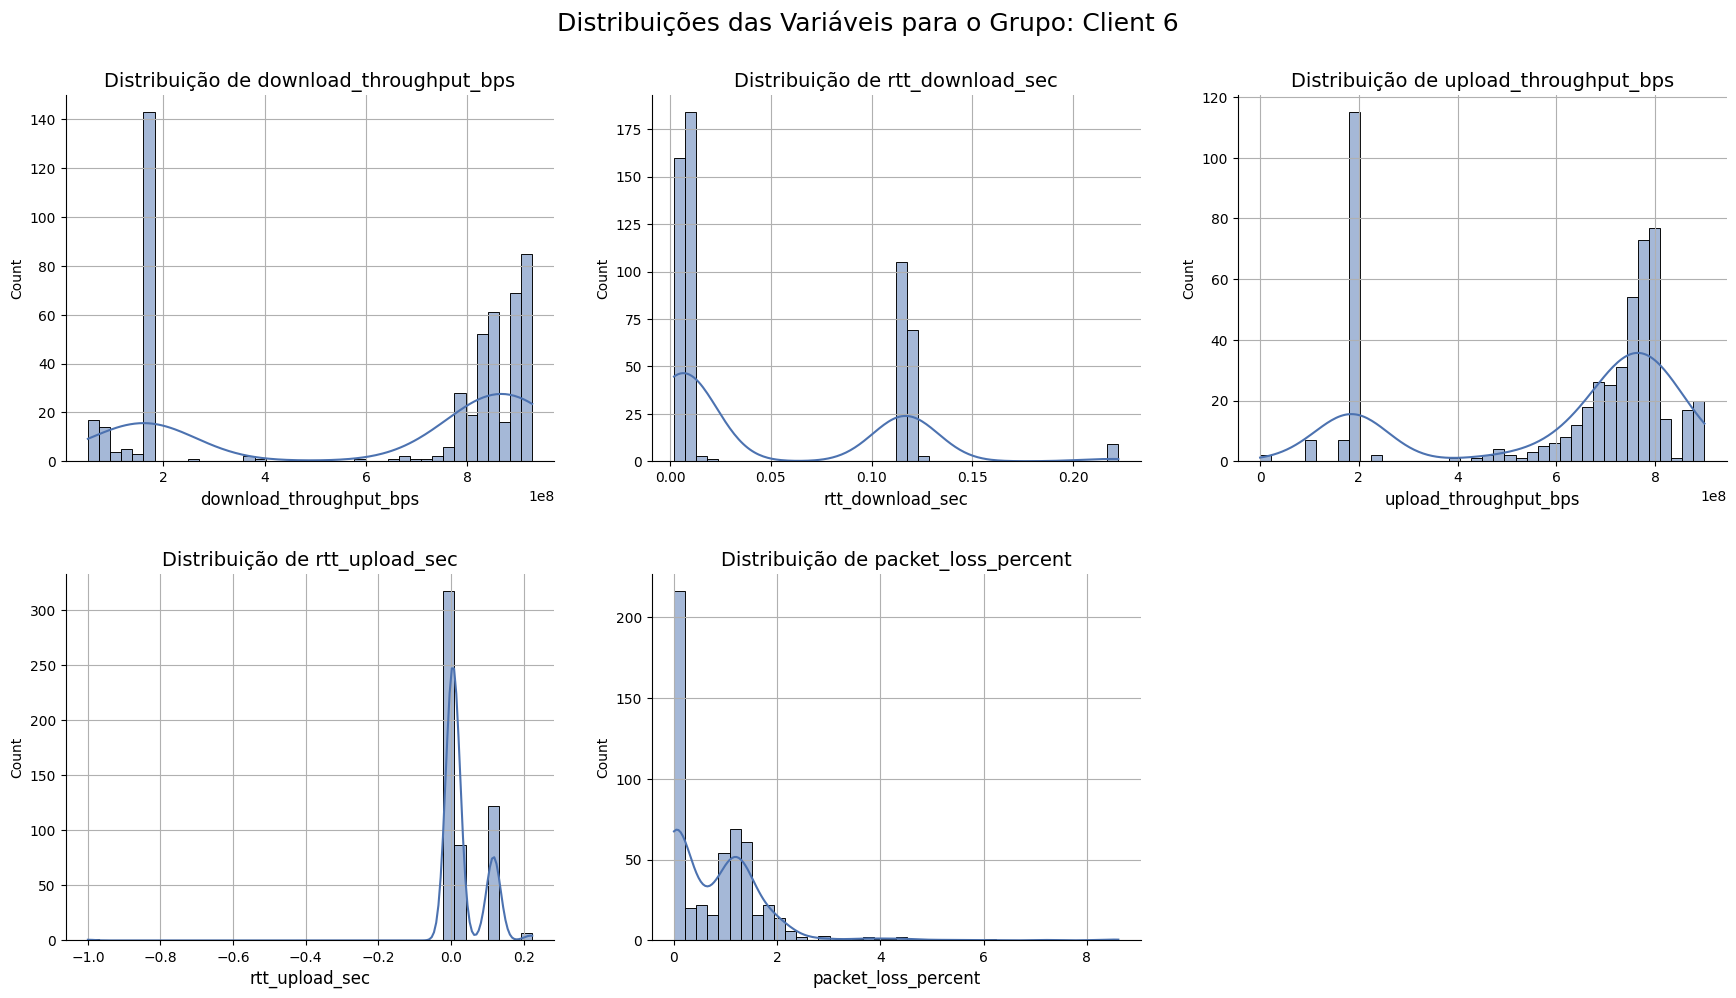

Figura salva: ../figures/eda/histogram_client08.png


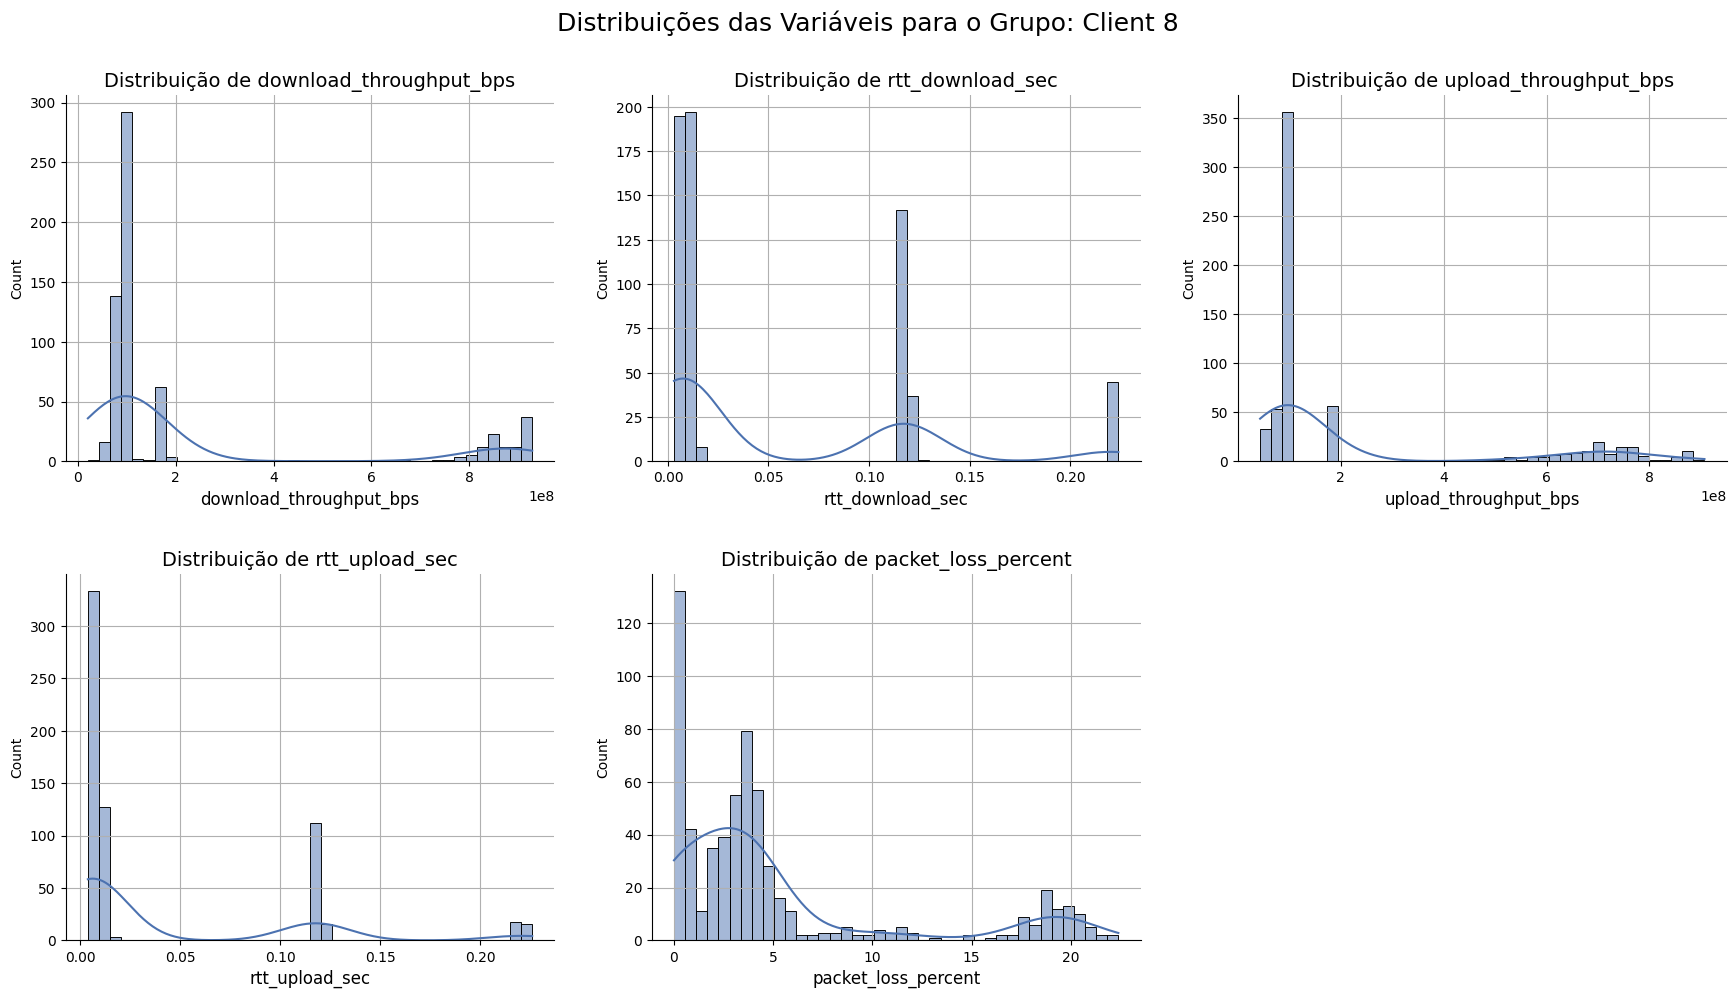

Figura salva: ../figures/eda/histogram_client07.png


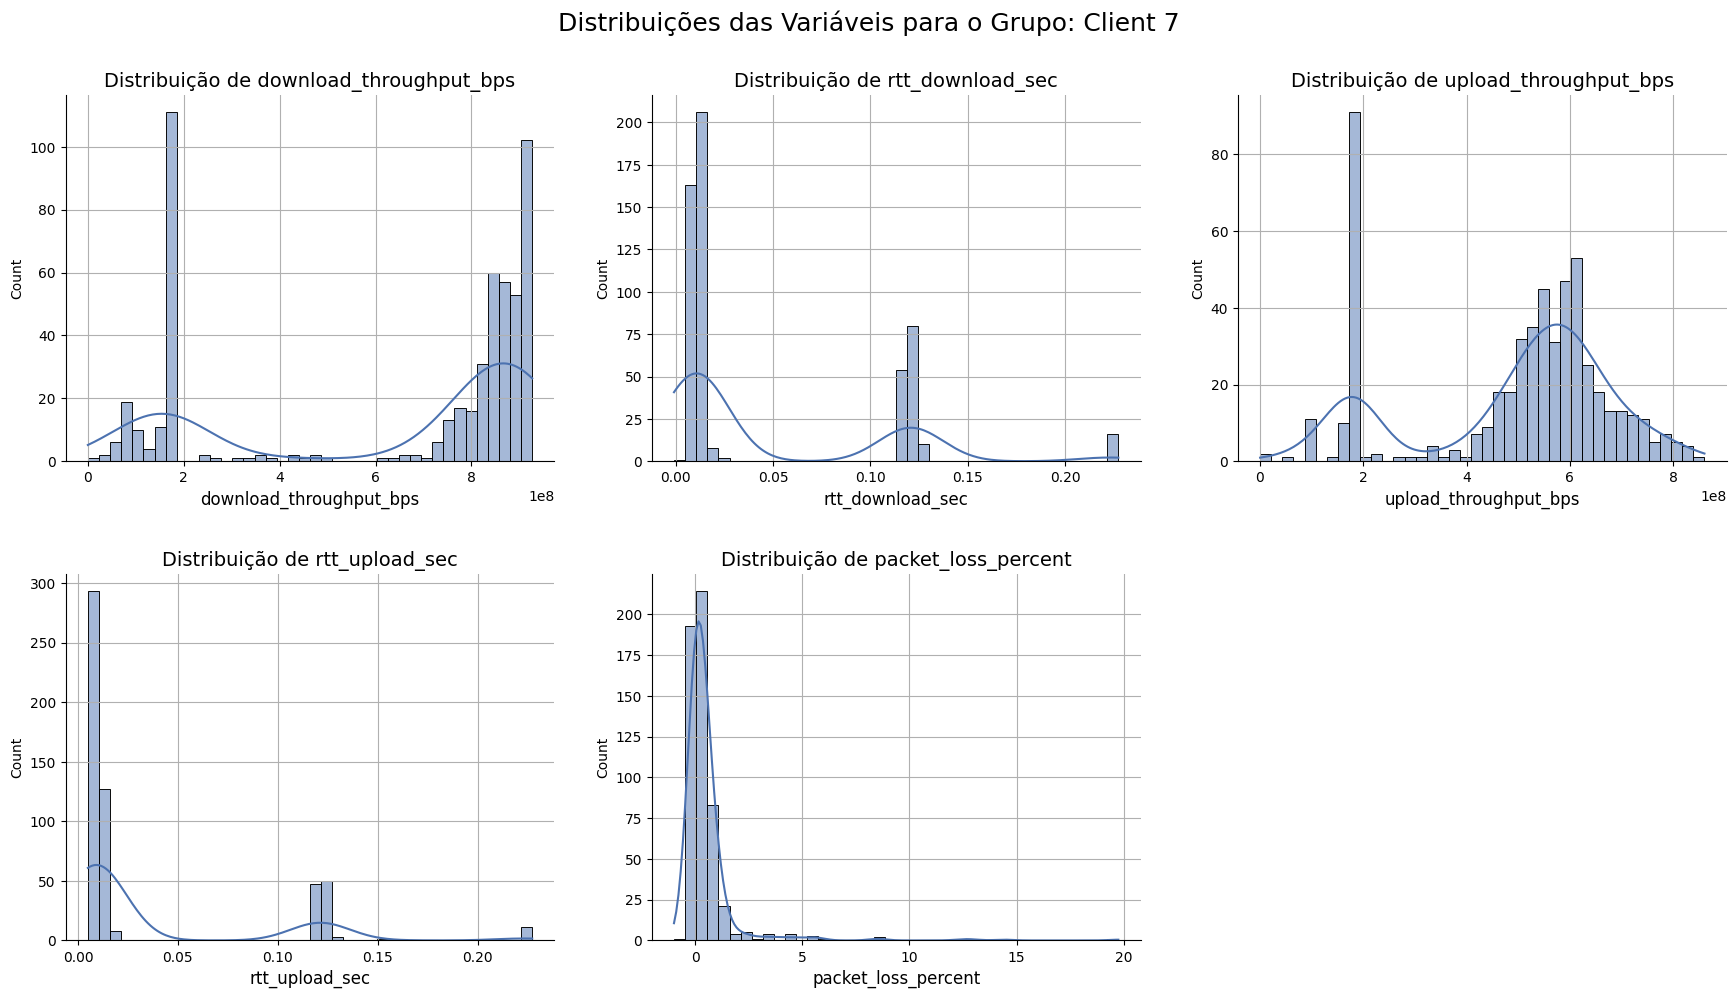

Figura salva: ../figures/eda/histogram_client11.png


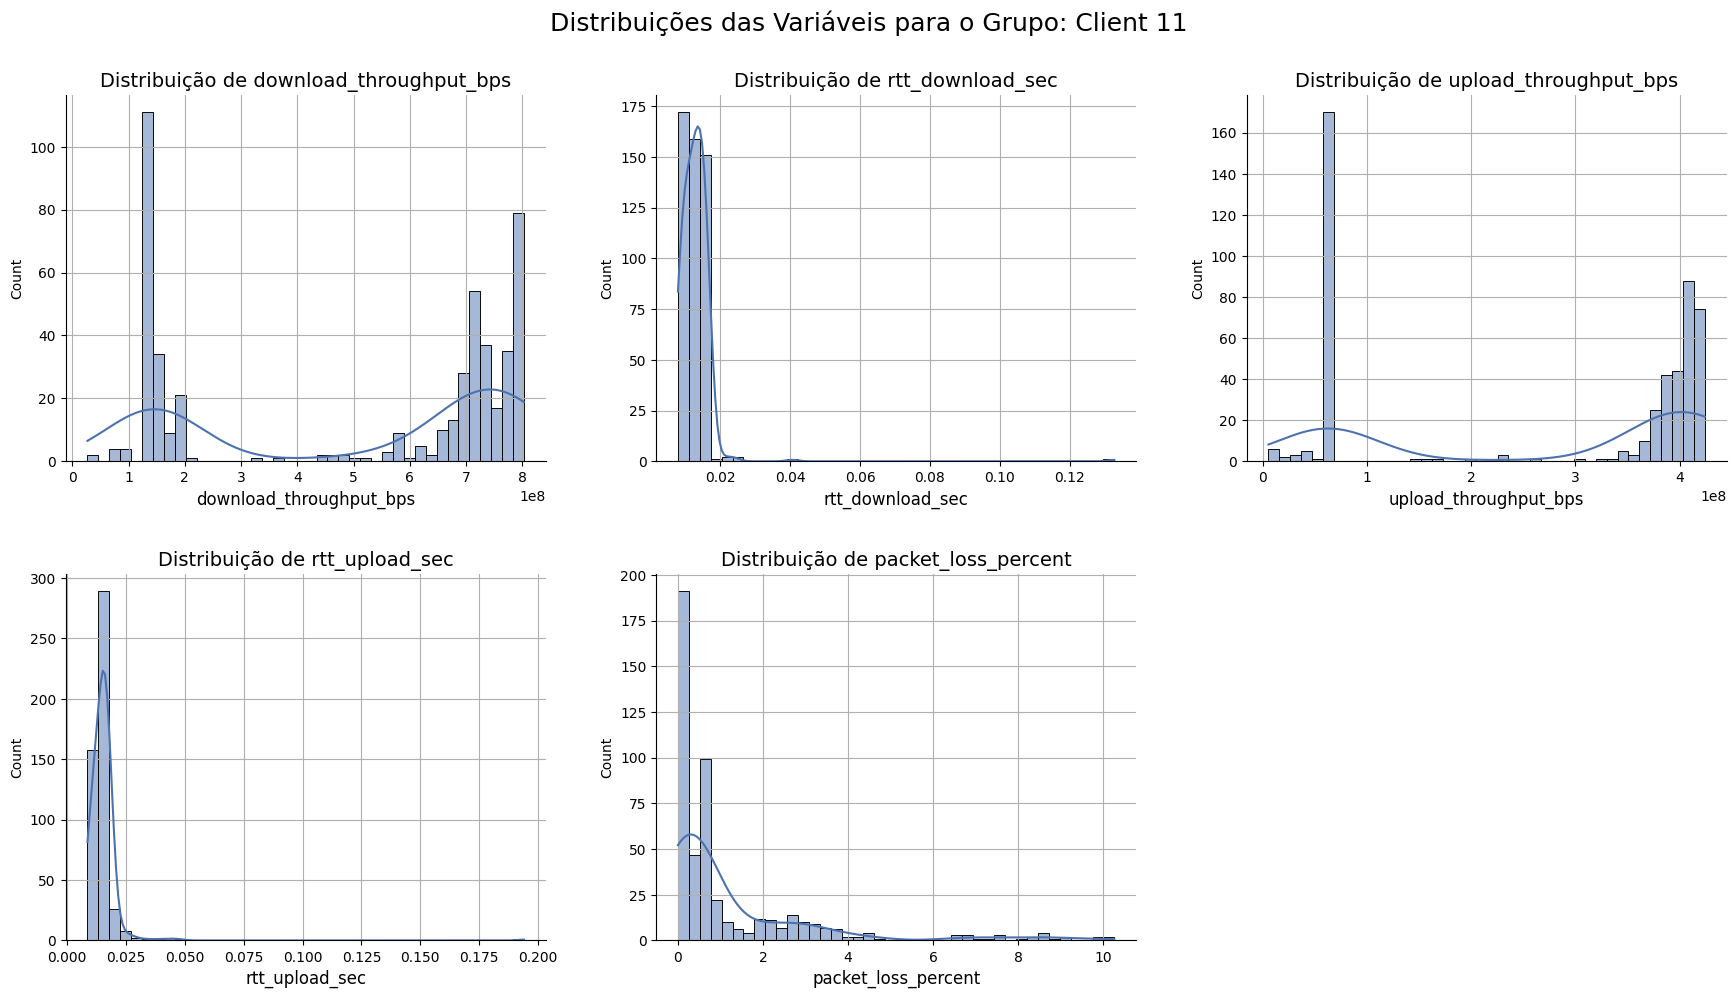

Figura salva: ../figures/eda/histogram_client04.png


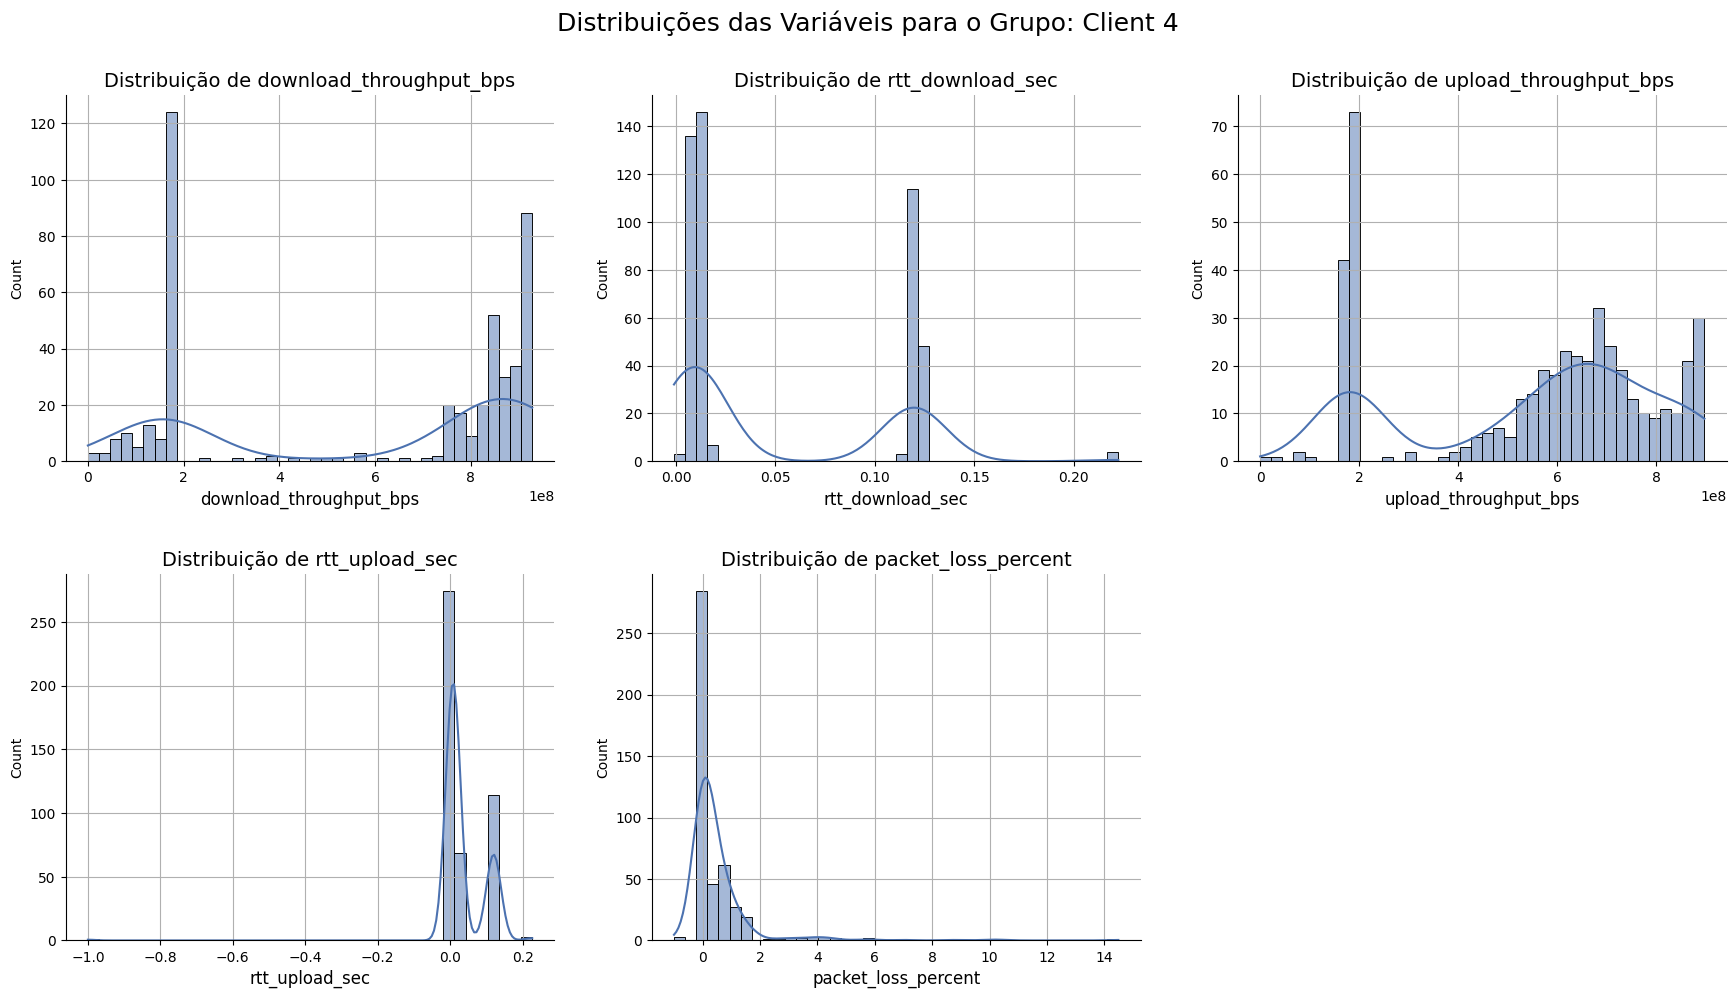

Figura salva: ../figures/eda/histogram_client02.png


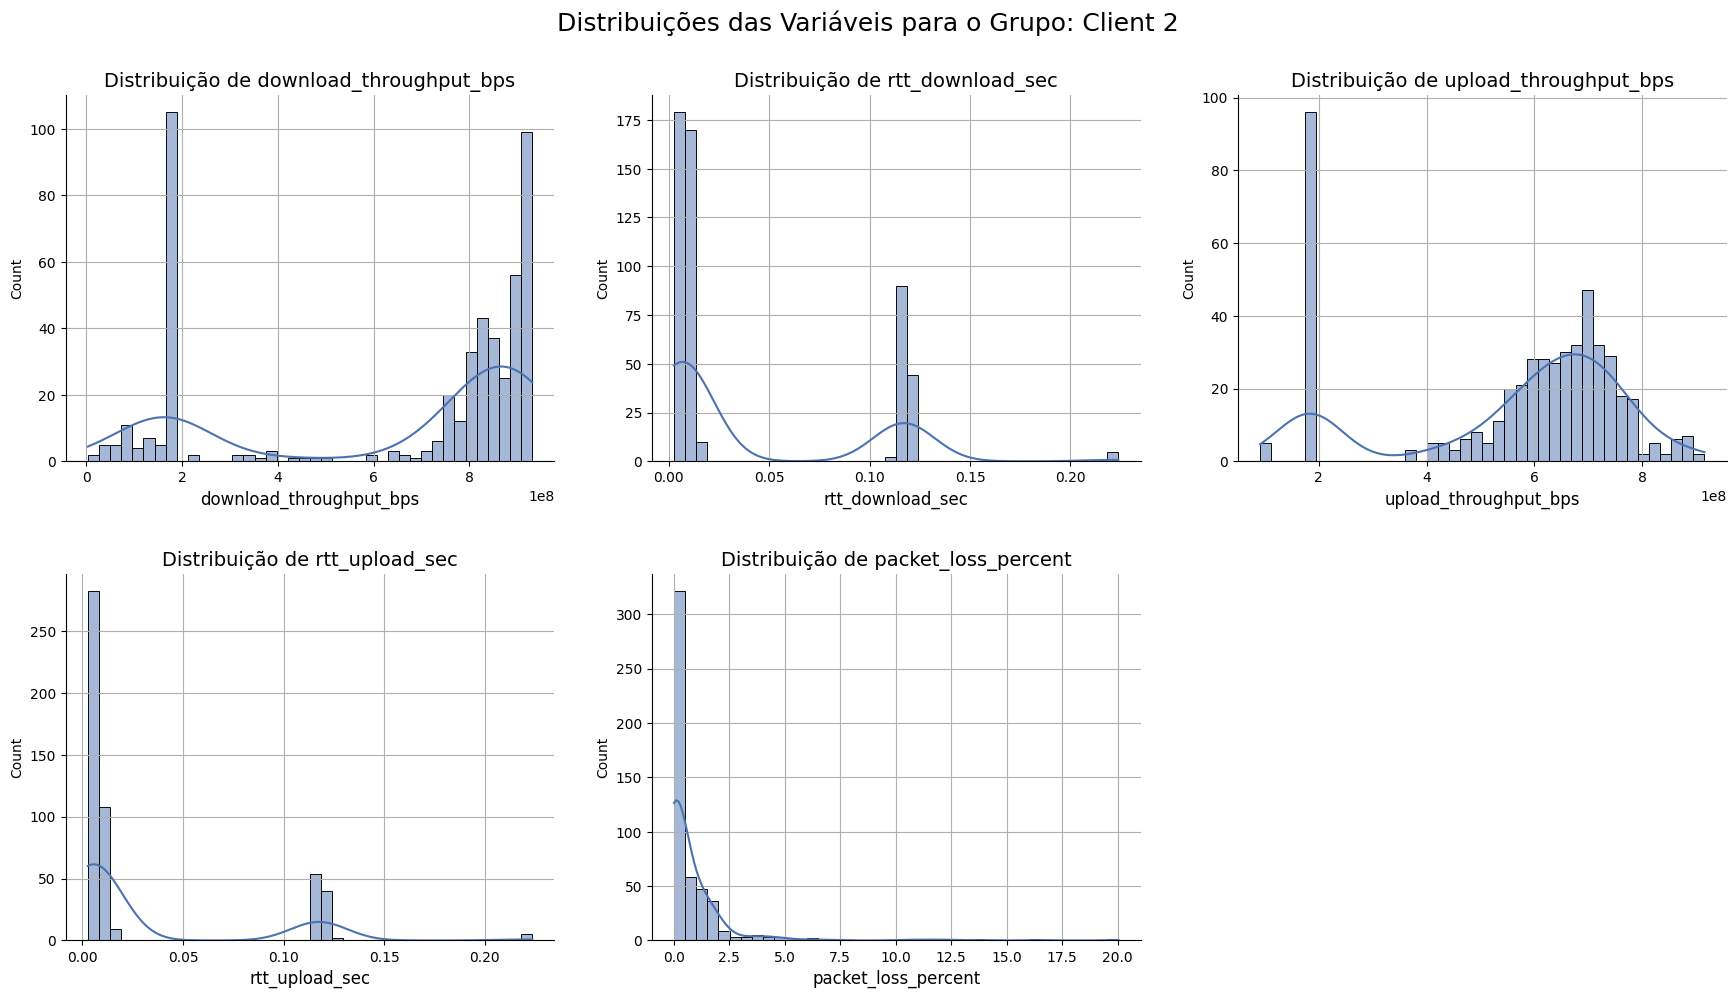

Figura salva: ../figures/eda/histogram_client09.png


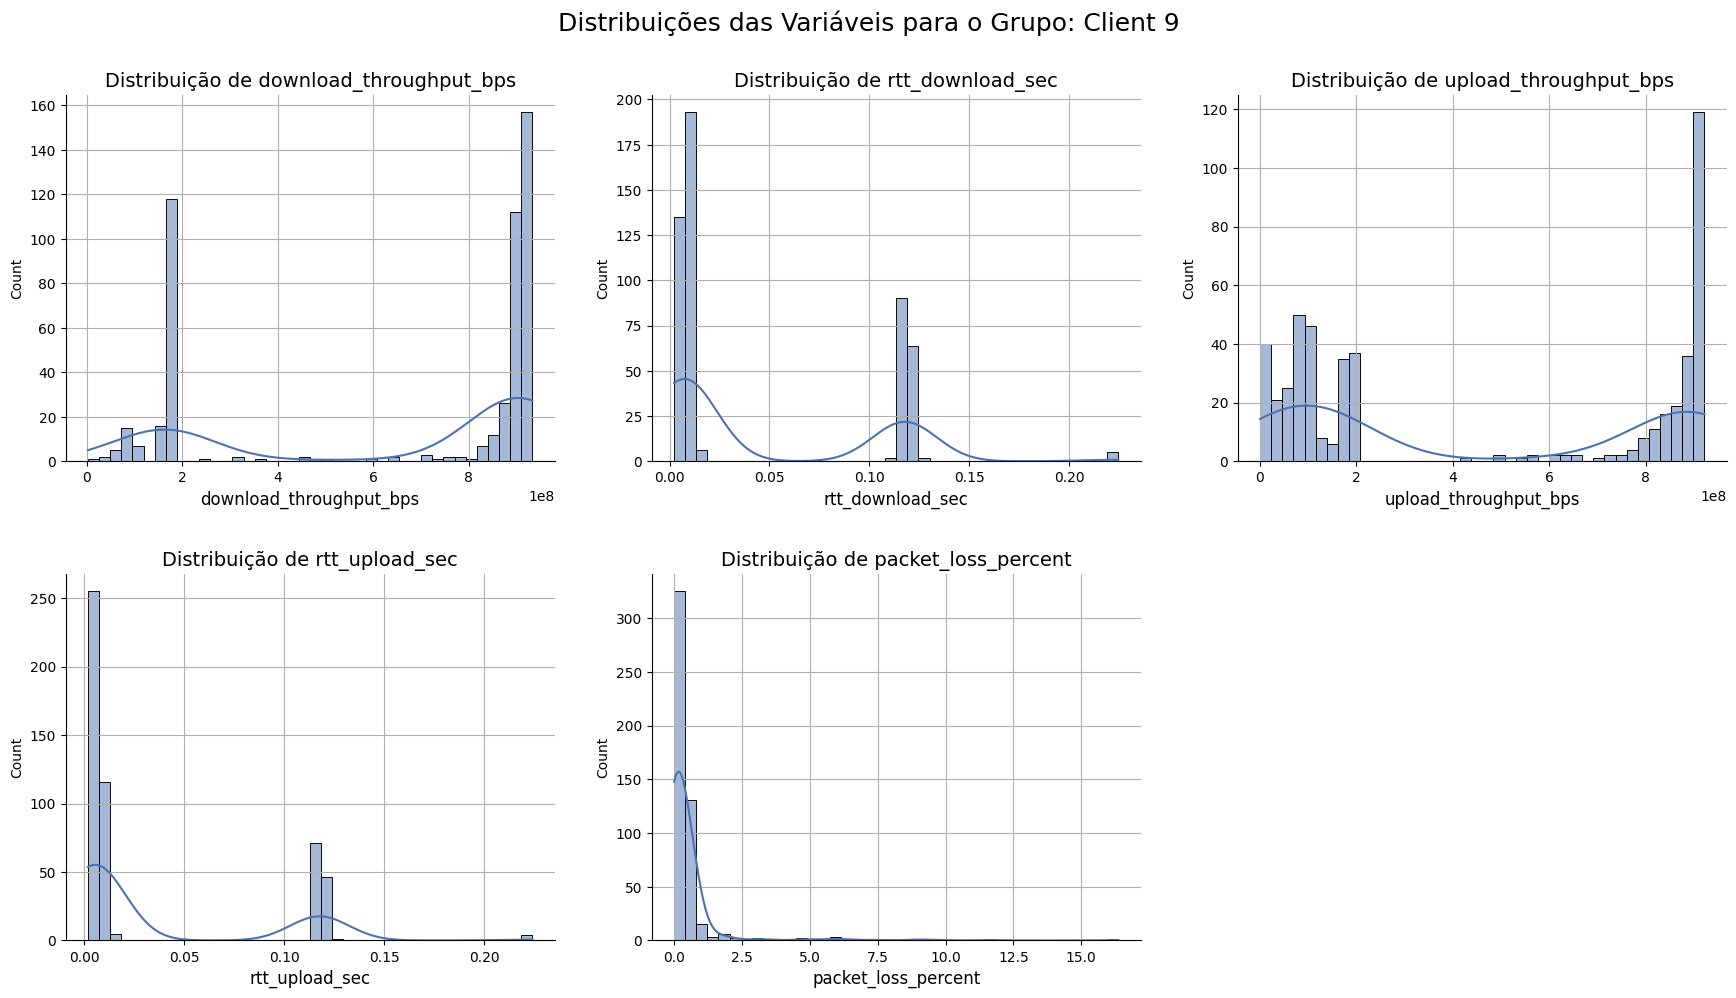

Geração de todas as figuras por grupo concluída.


In [9]:
client_col = 'client'; server_col = 'server'
GROUPING_COL = client_col 
group_values = df[GROUPING_COL].unique()

nrows = 2; ncols = 3
num_graficos = len(num_cols)

def format_group_name(raw_name):
    """
    Converte nomes de grupo como 'server01' para 'Server 1'.
    
    Args:
        raw_name (str): O nome original do grupo (ex: 'server01', 'client10').
    
    Returns:
        str: O nome formatado (ex: 'Server 1', 'Client 10').
    """
    raw_name = str(raw_name)
    if raw_name.lower().startswith('server'):
        prefix = 'Server'
        number = raw_name.lower().replace('server', '').lstrip('0')
    elif raw_name.lower().startswith('client'):
        prefix = 'Client'
        number = raw_name.lower().replace('client', '').lstrip('0')
    else:
        return raw_name.replace(" ", "_").replace("/", "-")
    return f"{prefix} {number}"

for group_name in group_values:
    df_filtered = df[df[GROUPING_COL] == group_name]
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 10))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.histplot(df_filtered[col], bins=40, ax=axes[i], kde=True)
        axes[i].set_title(f"Distribuição de {col}", fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)

    if num_graficos < nrows * ncols:
        axes[num_graficos].axis('off')
        
    plt.tight_layout(pad=3.0)
    formatted_name = format_group_name(group_name)
    fig.suptitle(f'Distribuições das Variáveis para o Grupo: {formatted_name}', fontsize=18, y=1.02)

    safe_name = str(group_name).replace(" ", "_").replace("/", "-")
    filename = f"histogram_{safe_name}.png"
    savefig(FIG_DIR, filename, dpi=600) 
    plt.show()
    plt.close(fig)

print("Geração de todas as figuras por grupo concluída.")

Análise comparativa dos histogramas para os clientes 13 e 10.

Figura salva: ../figures/eda/histogram_client_group.png


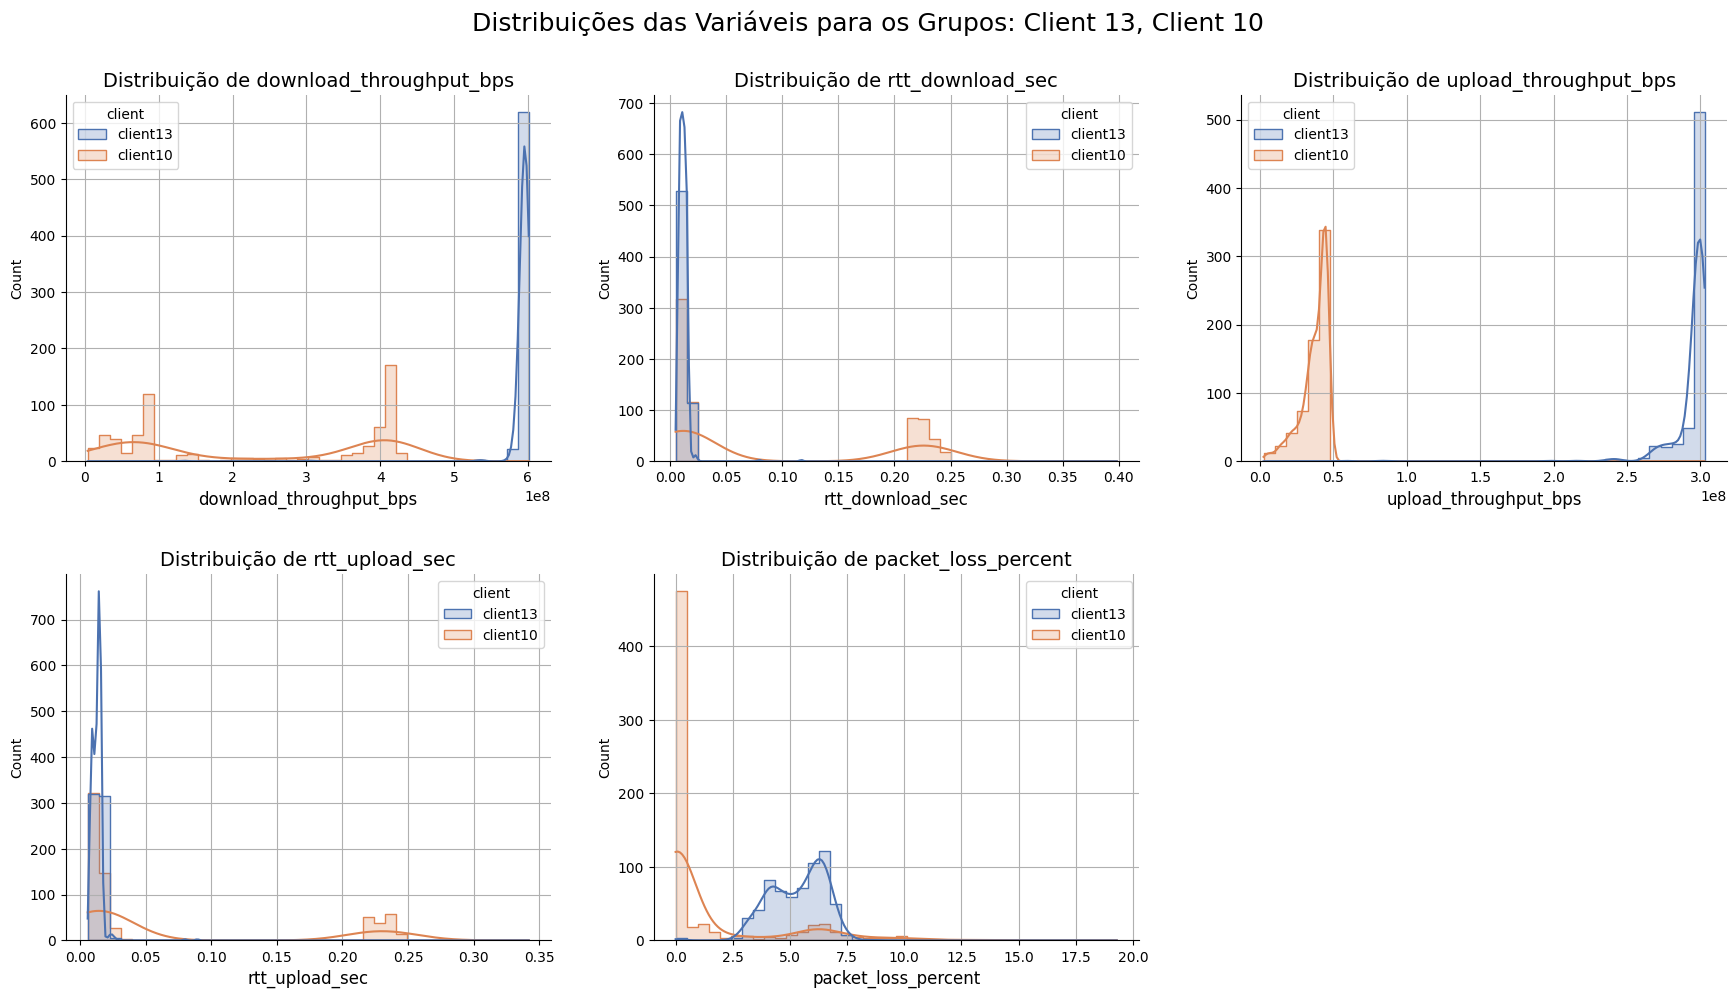

In [10]:
CATEGORICAL_FILTER = 'client' 
FILTRO_CATEGORIAS = ['client13', 'client10'] 
df_filtrado = df[df[CATEGORICAL_FILTER].isin(FILTRO_CATEGORIAS)]
FILTRO_CATEGORIAS_DISPLAY = [format_group_name(g) for g in FILTRO_CATEGORIAS]

nrows = 2; ncols = 3
num_graficos = len(num_cols) 

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data=df_filtrado, x=col, hue=CATEGORICAL_FILTER, bins=40, ax=axes[i], kde=True, element="step")
    axes[i].set_title(f"Distribuição de {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)

if num_graficos < nrows * ncols:
    axes[num_graficos].axis('off')

plt.tight_layout(pad=3.0)
title_groups = ', '.join(FILTRO_CATEGORIAS_DISPLAY)
fig.suptitle(f'Distribuições das Variáveis para os Grupos: {title_groups}',fontsize=18, y=1.02)
filename = f"histogram_client_group.png"
savefig(FIG_DIR, filename, dpi=600) 
plt.show()

Análise comparativa dos histogramas para o servidor 2 e cliente 13.

Figura salva: ../figures/eda/histogram_client_server.png


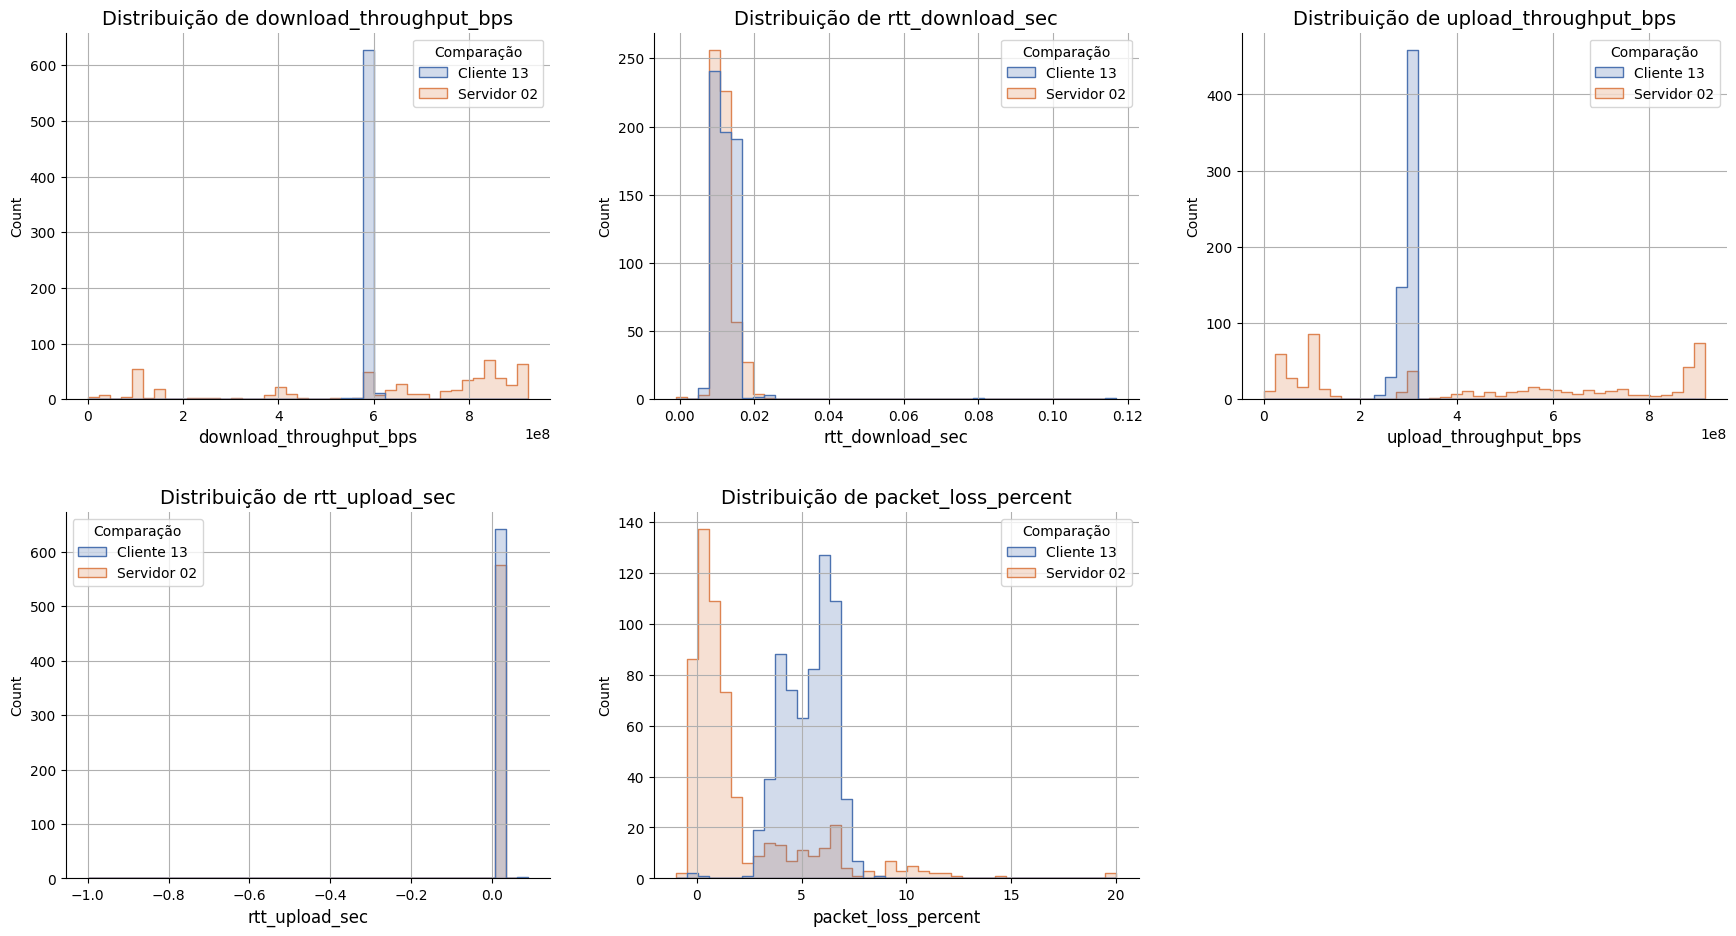

In [11]:
CLIENT_COL = 'client'
SERVER_COL = 'server'
TARGET_CLIENT_VAL = 'client13'
TARGET_SERVER_VAL = 'server02'
CATEGORICAL_FILTER_HUE = 'Comparação'

df_client_13 = df[df[CLIENT_COL] == TARGET_CLIENT_VAL].copy()
df_client_13[CATEGORICAL_FILTER_HUE] = f'Cliente {TARGET_CLIENT_VAL.replace("client", "")}'
df_server_02 = df[df[SERVER_COL] == TARGET_SERVER_VAL].copy()
df_server_02[CATEGORICAL_FILTER_HUE] = f'Servidor {TARGET_SERVER_VAL.replace("server", "")}'

df_filtrado = pd.concat([df_client_13, df_server_02], ignore_index=True)
nrows = 2; ncols = 3
num_graficos = len(num_cols) 

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if i < nrows * ncols:
        sns.histplot(
            data=df_filtrado, 
            x=col, 
            hue=CATEGORICAL_FILTER_HUE, 
            bins=40, 
            ax=axes[i],
            element="step",
        )
        axes[i].set_title(f"Distribuição de {col}", fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)

if num_graficos < nrows * ncols:
    for j in range(num_graficos, nrows * ncols):
        axes[j].axis('off')

plt.tight_layout(pad=3.0)
title_groups = f'Cliente {TARGET_CLIENT_VAL.replace("client", "")} vs. Servidor {TARGET_SERVER_VAL.replace("server", "")}'
#fig.suptitle(f'Distribuições das Variáveis para Comparação: {title_groups}', fontsize=18, y=1.02)
filename = f"histogram_client_server.png"
savefig(FIG_DIR, filename, dpi=600) 
plt.show()

Estudo para entender a correlação entre as variáveis contínuas para desenvolvimento de novos gráficos scatter.

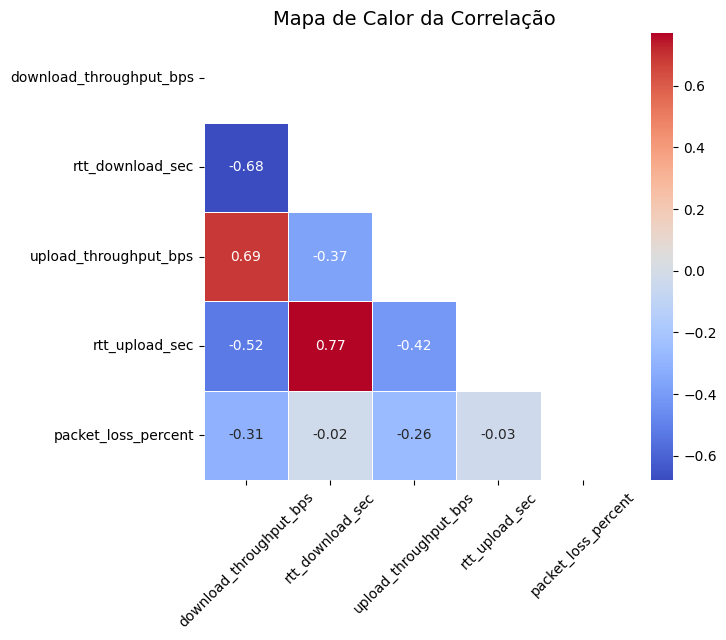

In [12]:
matriz_corr = df.select_dtypes(include=np.number).corr()
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
num_cols = matriz_corr.shape[0]
plt.figure(figsize=(num_cols * 1.5, num_cols * 1.3)) 

ax = sns.heatmap(matriz_corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
                linewidths=0.5, linecolor='white', annot_kws={"fontsize": 10}, cbar=True)
ax.grid(False) 

plt.title('Mapa de Calor da Correlação', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Análise gráfica comparativa entre diferentes clientes e servidores.

- Cliente 13

Figura salva: ../figures/eda/chart_download_throughput_bps_client13.png


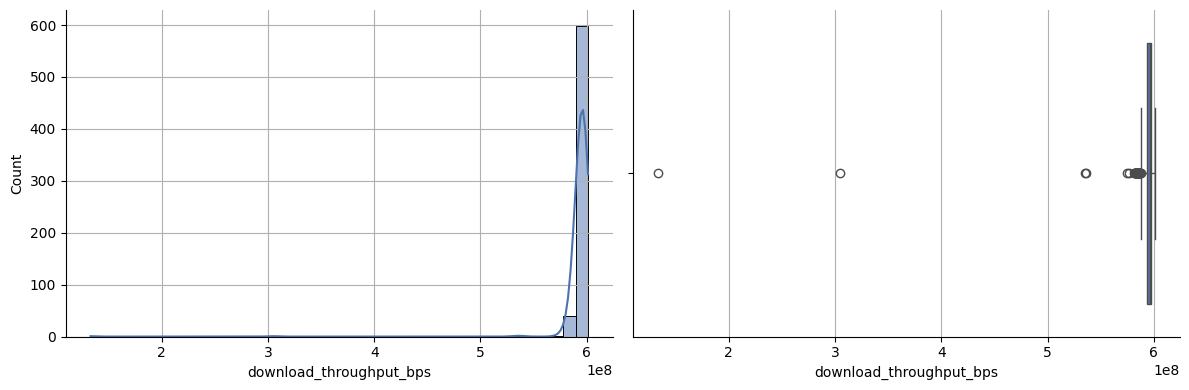

Figura salva: ../figures/eda/chart_rtt_download_sec_client13.png


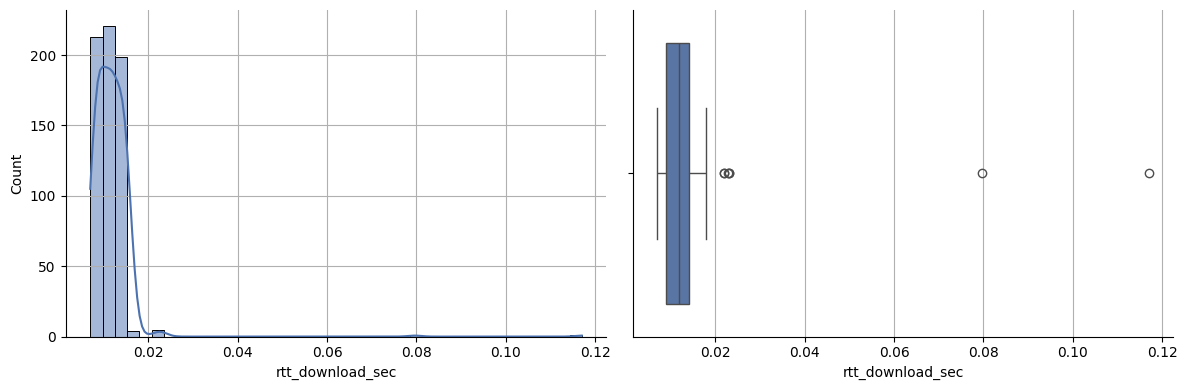

Figura salva: ../figures/eda/chart_upload_throughput_bps_client13.png


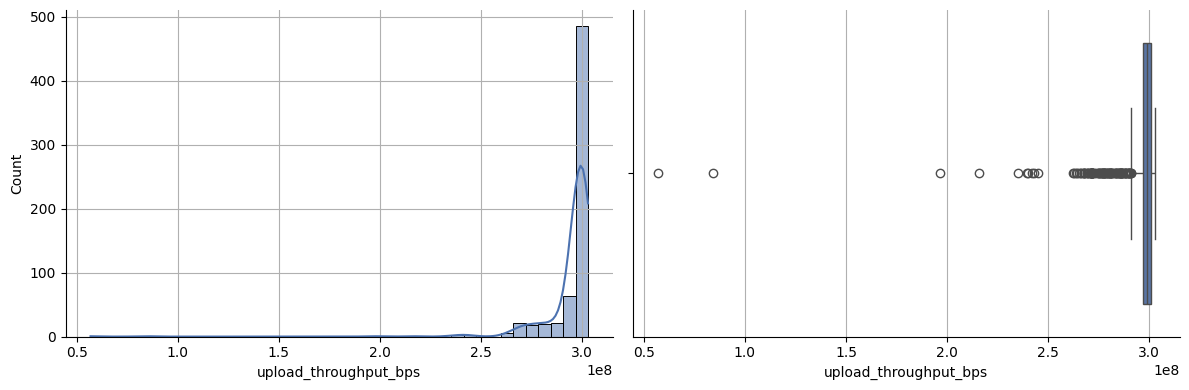

Figura salva: ../figures/eda/chart_rtt_upload_sec_client13.png


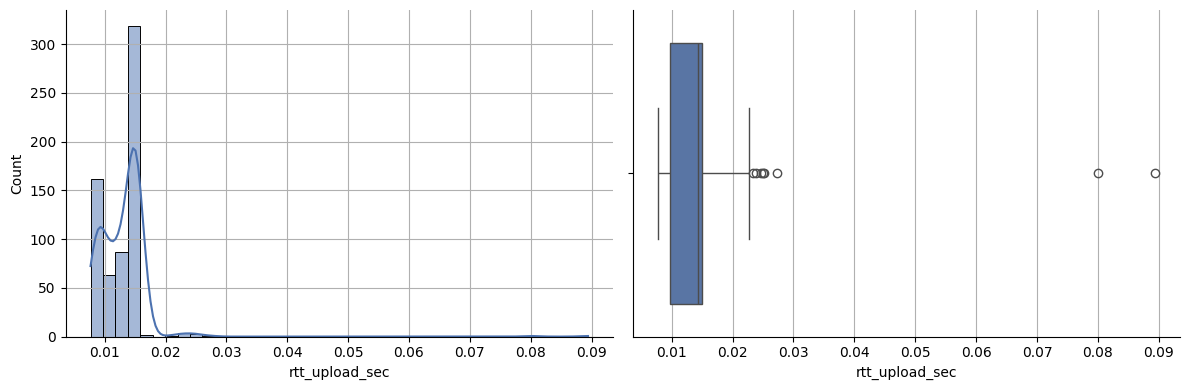

Figura salva: ../figures/eda/chart_packet_loss_percent_client13.png


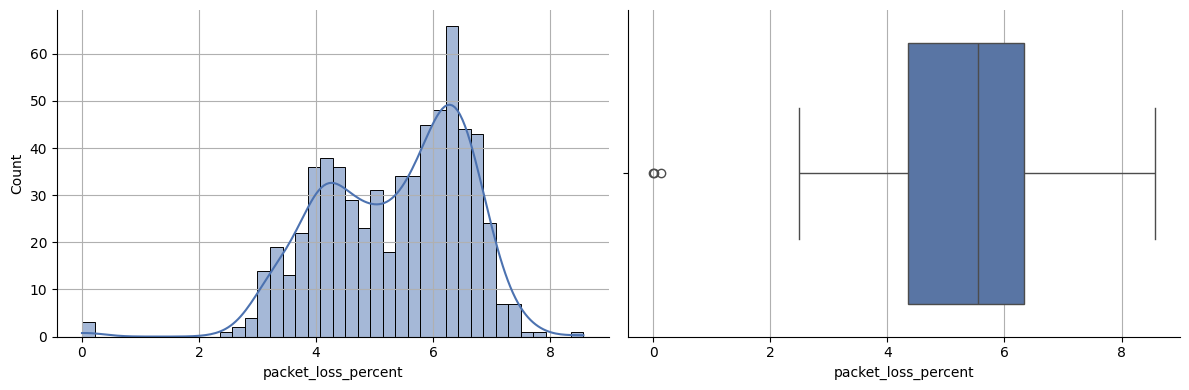

Figura salva: ../figures/eda/scatter_client13.png


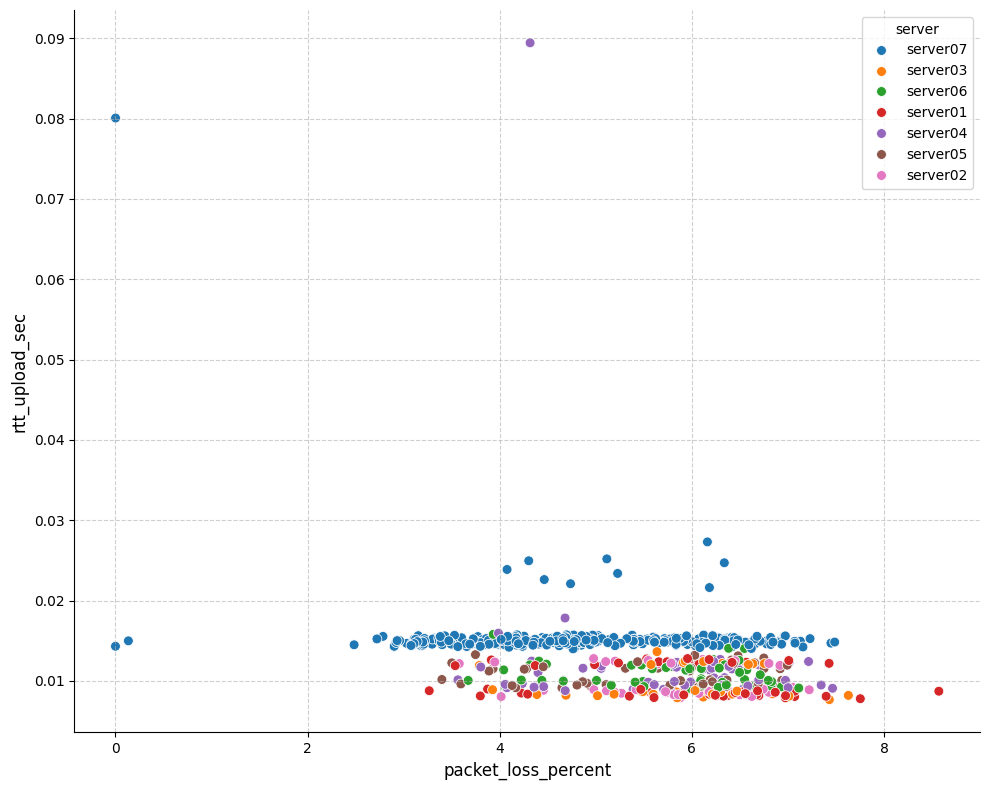

In [13]:
CLIENTE_ALVO = 'client13'
client_col = 'client'
df_cliente = df[df[client_col] == CLIENTE_ALVO].copy()
nome_formatado = format_group_name(CLIENTE_ALVO)
VAR_X = 'packet_loss_percent'
VAR_Y = 'rtt_upload_sec'

for col in [col for col in df_cliente.columns if col not in ['timestamp','client', 'server']]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df_cliente[col], bins=40, ax=axes[0], kde=True)
    #axes[0].set_title(f"Distribuição de {col}")
    sns.boxplot(x=df_cliente[col], ax=axes[1])
    #axes[1].set_title(f"Boxplot de {col}")

    #fig.suptitle(f'Análise de Distribuição para {nome_formatado}', fontsize=14, y=1.02)
    plt.tight_layout()
    filename = f"chart_{col}_{CLIENTE_ALVO}.png"
    savefig(FIG_DIR, filename, dpi=300)
    plt.show()

fig_scatter, ax_scatter = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df_cliente, x=VAR_X,  y=VAR_Y, hue=server_col, palette='tab10', s=50, ax=ax_scatter)
#ax_scatter.set_title(f'Relação entre {VAR_X} e {VAR_Y} para {nome_formatado}', fontsize=16)
ax_scatter.set_xlabel(VAR_X, fontsize=12)
ax_scatter.set_ylabel(VAR_Y, fontsize=12)

plt.legend(title=server_col)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

filename_scatter = f"scatter_{CLIENTE_ALVO}.png"
savefig(FIG_DIR, filename_scatter, dpi=300)
plt.show()
plt.close(fig_scatter)

- Servidor 02

Figura salva: ../figures/eda/chart_download_throughput_bps_server02.png


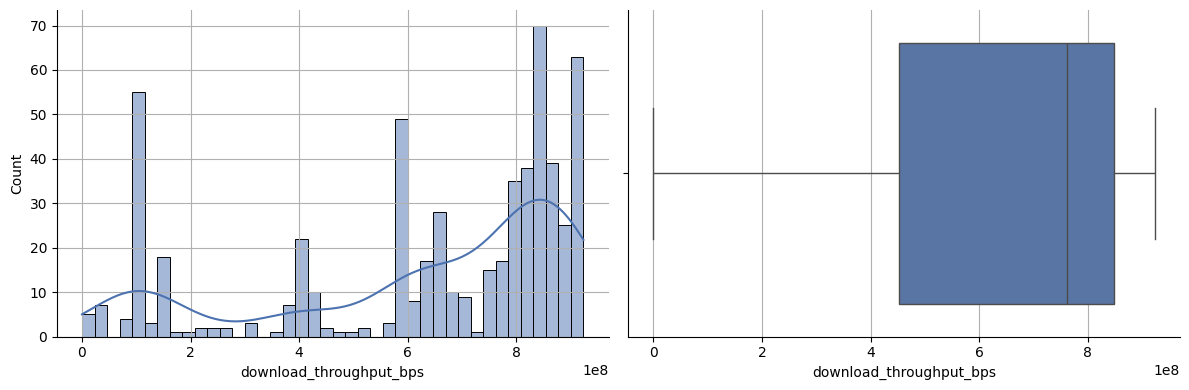

Figura salva: ../figures/eda/chart_rtt_download_sec_server02.png


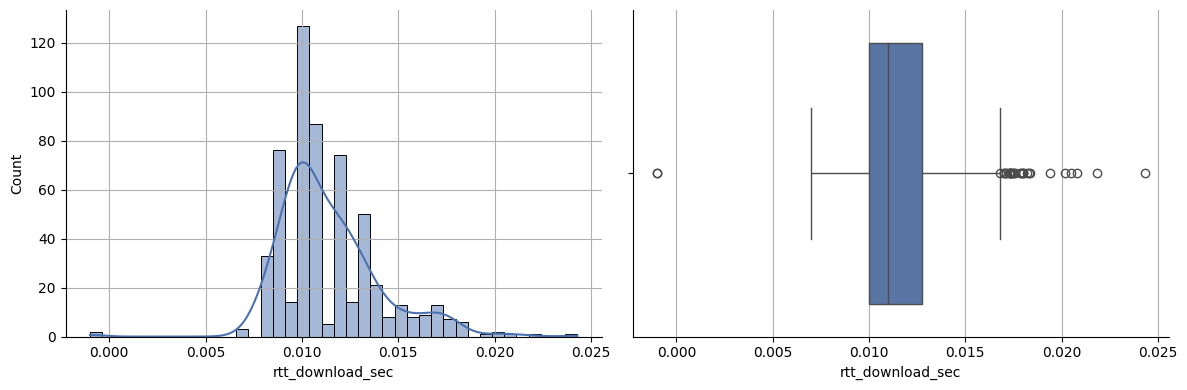

Figura salva: ../figures/eda/chart_upload_throughput_bps_server02.png


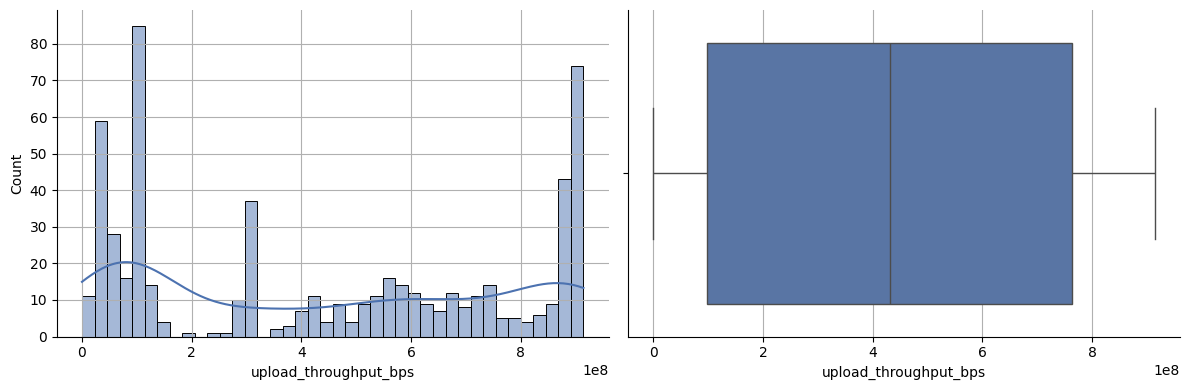

Figura salva: ../figures/eda/chart_rtt_upload_sec_server02.png


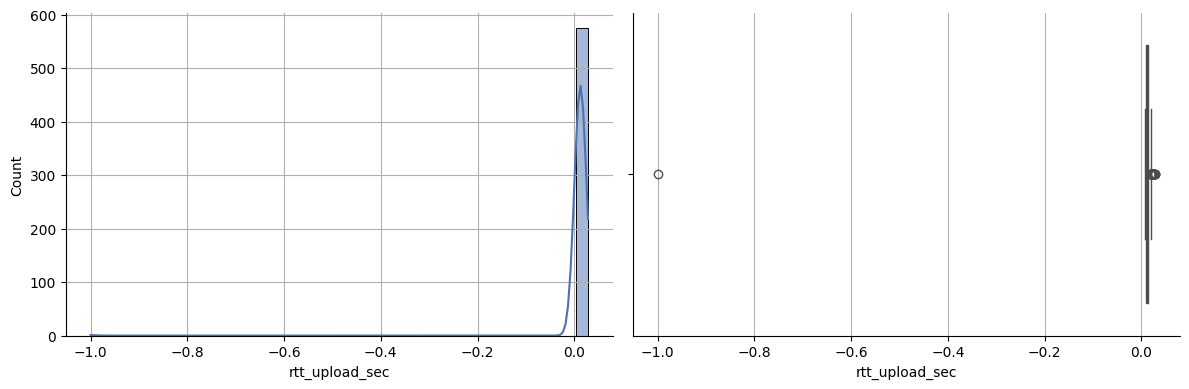

Figura salva: ../figures/eda/chart_packet_loss_percent_server02.png


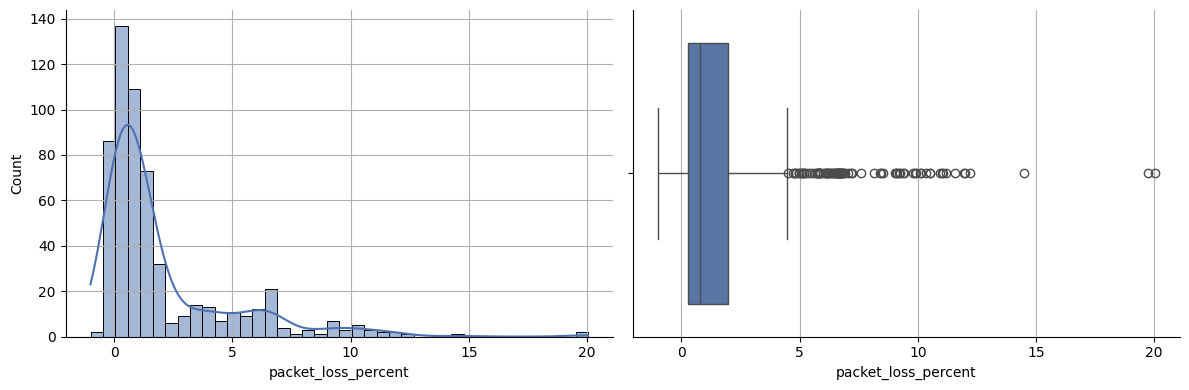

Figura salva: ../figures/eda/scatter_server02.png


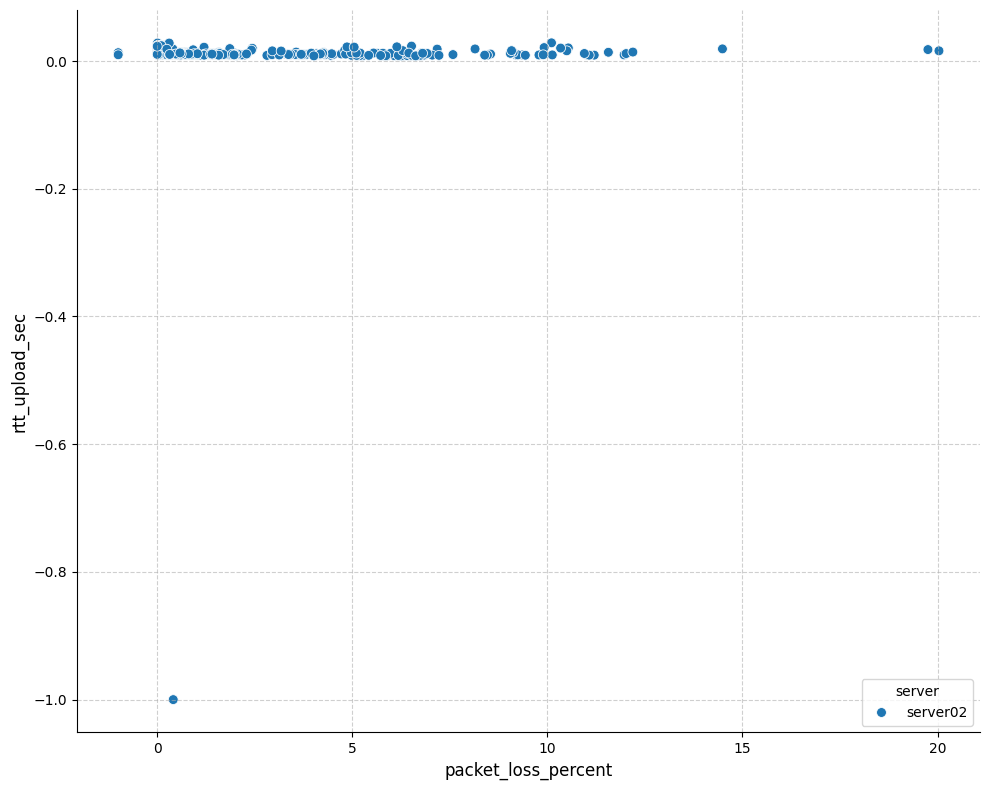

In [14]:
CLIENTE_ALVO = 'server02'
client_col = 'server'
df_cliente = df[df[client_col] == CLIENTE_ALVO].copy()
nome_formatado = format_group_name(CLIENTE_ALVO)
VAR_X = 'download_throughput_bps'
VAR_Y = 'rtt_download_sec'
VAR_X = 'packet_loss_percent'
VAR_Y = 'rtt_upload_sec'

for col in [col for col in df_cliente.columns if col not in ['timestamp','client', 'server']]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df_cliente[col], bins=40, ax=axes[0], kde=True)
    #axes[0].set_title(f"Distribuição de {col}")
    sns.boxplot(x=df_cliente[col], ax=axes[1])
    #axes[1].set_title(f"Boxplot de {col}")

    #fig.suptitle(f'Análise de Distribuição para {nome_formatado}', fontsize=14, y=1.02)
    plt.tight_layout()
    filename = f"chart_{col}_{CLIENTE_ALVO}.png"
    savefig(FIG_DIR, filename, dpi=300)
    plt.show()

fig_scatter, ax_scatter = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df_cliente, x=VAR_X,  y=VAR_Y, hue=server_col, palette='tab10', s=50, ax=ax_scatter)
#ax_scatter.set_title(f'Relação entre {VAR_X} e {VAR_Y} para {nome_formatado}', fontsize=16)
ax_scatter.set_xlabel(VAR_X, fontsize=12)
ax_scatter.set_ylabel(VAR_Y, fontsize=12)

plt.legend(title=server_col)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

filename_scatter = f"scatter_{CLIENTE_ALVO}.png"
savefig(FIG_DIR, filename_scatter, dpi=300)
plt.show()
plt.close(fig_scatter)

---

Avaliação do quantitativo entre clientes e servidores.

In [15]:
# Itere sobre colunas 'object' ou 'category'
colunas_categoricas = df.select_dtypes(include=['object']).columns
for col in colunas_categoricas:
    print(f"\n--- Frequência de {col} ---")
    print(df[col].value_counts(normalize=True).head()) # normalize=True mostra o percentual


--- Frequência de client ---
client
client10    0.093693
client13    0.090871
client12    0.090306
client08    0.088190
client07    0.076196
Name: proportion, dtype: float64

--- Frequência de server ---
server
server07    0.528573
server04    0.081699
server02    0.081276
server06    0.079159
server05    0.076901
Name: proportion, dtype: float64


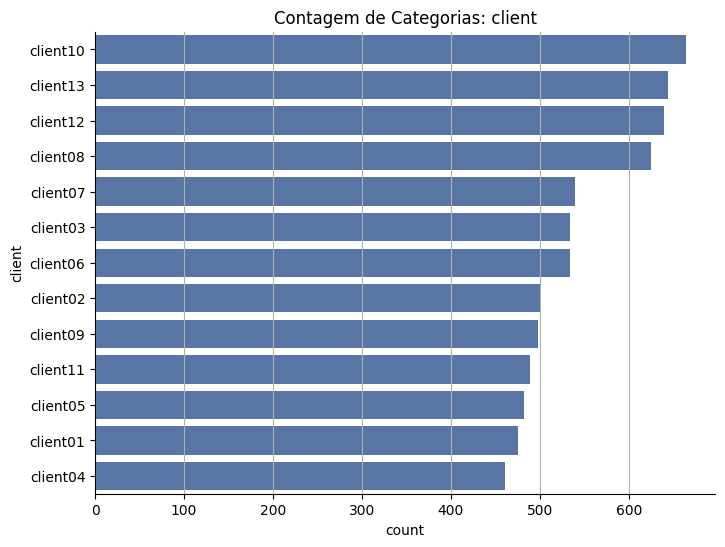

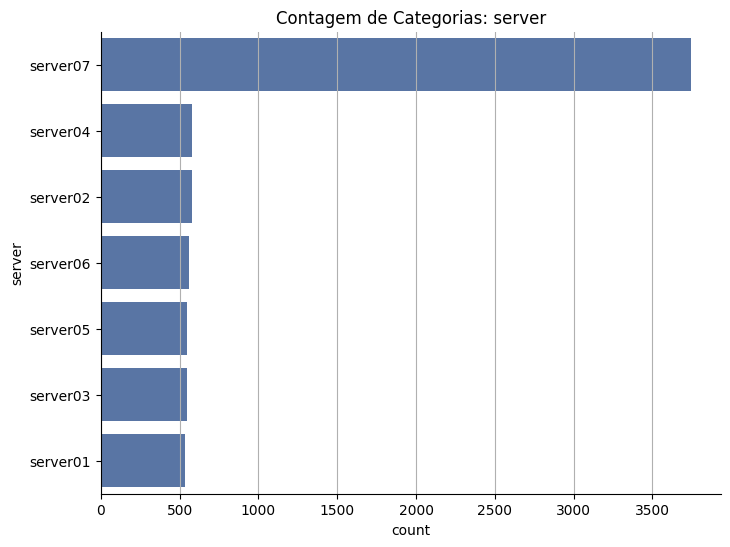

In [16]:
for col in colunas_categoricas:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Contagem de Categorias: {col}')
    plt.show()

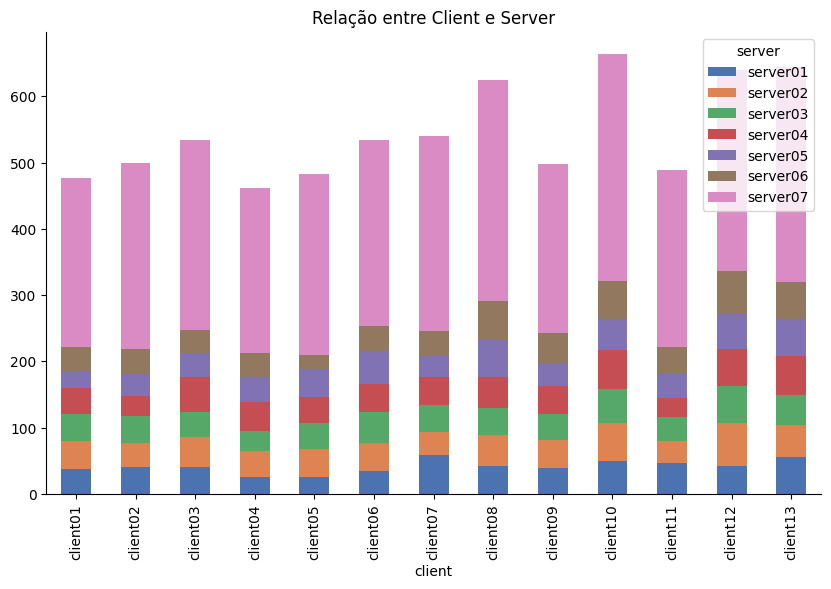

In [17]:
# Tabela de Contagem
tabela_cont = pd.crosstab(df['client'], df['server'])
tabela_cont.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relação entre Client e Server')
plt.grid(False)
plt.show()